# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

RANDOM_STATE = 42

## **Introduction**

The video game industry has experienced constant change, shaped by technological innovation, shifting consumer preferences, and global market dynamics. Using a dataset of over 16,000 titles released between 1980 and 2016, this project examines key factors that define the industry’s performance.

The analysis covers:

* Industry evolution over time — from the early years of small release counts to explosive growth in the 2000s and the decline after 2009.
* Platform performance — showing how consoles like the PS2, PS3, Wii, Xbox 360, and DS dominated sales, with each excelling in different regions.
* Regional dynamics — comparing the strength of North America, Europe, and Japan, as well as how certain platforms and genres appealed differently by region.
* Genres and sales distribution — highlighting how Action dominates in total games and sales, Shooter leads in average sales per game, and Sports consistently performs strongly.
* Ratings and consumer trends — showing how ESRB ratings (E, M, T) shaped global sales, with notable differences between regions.
* Scores and sales relationships — evaluating whether critic and user reviews align with commercial success.
* Statistical testing — confirming significant differences between platforms and genres in terms of user ratings.

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
df= pd.read_csv('/datasets/games.csv')

In [3]:
# Display basic information about the dataset
df.info()

df.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Describe

df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
# Check for duplicate entries
num_duplicate_rows= df.duplicated().sum()
print(num_duplicate_rows)

#Checking column "Name", "Platform", and "Year_of_Release", since the same title can exist on multiple platforms or be released across years.
duplicate_name= df[df.duplicated(subset=["Name", "Platform","Year_of_Release"])]
duplicate_name_sum =df.duplicated(subset=["Name", "Platform","Year_of_Release"]).sum()
print(duplicate_name_sum)
print(duplicate_name)




0
2
                Name Platform  Year_of_Release   Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
14244            NaN      GEN           1993.0     NaN       0.0      0.00      0.03          0.0           NaN   
16230  Madden NFL 13      PS3           2012.0  Sports       0.0      0.01      0.00          0.0          83.0   

      User_Score Rating  
14244        NaN    NaN  
16230        5.5      E  


In [6]:
#Drop duplicates

df.drop_duplicates(subset=["Name", "Platform", "Year_of_Release"], inplace=True)


### **Observations**

* I checked for duplicate rows and found that there were no completely identical rows.
* I then checked for duplicates based on Name, Platform, and Year_of_Release, since the same title can exist on multiple platforms or be released in different years. In this case, two duplicates were found.

### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

### Answers

* The dataset contains 16,715 entries.
* Current data types include object and float64. Planned changes:
  * 'Platform'-Change to category
  * 'Year_of_Release'- Change to Int64
  * 'Genre'-Change to category
  * 'User_Score'-Change to float
  * 'Rating'-Change to category
* There are multiple missing values that will be corrected in the next step
* From a quick look at the dataset "display", before cleaning:
  * Year_Of_Release ranges from 1980 to 2016
  * Some columns have smaller standard deviations(e.g., jp_sales and other_sales)
  * Some columns have larger standard deviations(e.g., critic_score"),which can likely be attribited to missing values



## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [7]:
# Convert column names to lowercase
print(df.columns)

df.columns = df.columns.str.strip()
df= df.rename(columns={
        'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'raiting'
    }
)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales',
       'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [8]:
# Verify the changes
print(df.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
       'critic_score', 'user_score', 'raiting'],
      dtype='object')


### 2.2 Data Type Conversion

In [9]:
# Check current data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  raiting          9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
# Make changes to data types if necessary
df["year_of_release"] = df["year_of_release"].astype("Int64")
df["genre"] = df["genre"].astype("category")
df["platform"] = df["platform"].astype("category")
df["raiting"] = df["raiting"].astype("category")
df["user_score"] = pd.to_numeric(df["user_score"], errors="coerce")

# Describe the columns where the data types have been changed and why.

In [11]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16712 non-null  object  
 1   platform         16713 non-null  category
 2   year_of_release  16444 non-null  Int64   
 3   genre            16712 non-null  category
 4   na_sales         16713 non-null  float64 
 5   eu_sales         16713 non-null  float64 
 6   jp_sales         16713 non-null  float64 
 7   other_sales      16713 non-null  float64 
 8   critic_score     8136 non-null   float64 
 9   user_score       7589 non-null   float64 
 10  raiting          9948 non-null   category
dtypes: Int64(1), category(3), float64(6), object(1)
memory usage: 1.2+ MB


### **Observations**

* Changed "year_of_release" to Int64 which keeps the NaN values (for now) but still allows perform aritmetic operations, unlike a string, while removing the decimal point.
* Changed "genre","platform" and "raiting" to a category, to make grouping easier and outputs cleaner.
* Changed "user_score" to a float. Entries marked as TBD were converted to NaN so the column type could be changed and aritmetic operations can be performed. 



### 2.3 Handling Missing Values

In [13]:
# Examine missing values
df.isna().sum()


name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
raiting            6765
dtype: int64

In [14]:
# Calculate percentage of missing values
missing_count = df.isna().sum()
missing_pct = (missing_count / len(df)) * 100
missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
})

print(missing_summary)

                 missing_count  missing_pct
name                         1     0.005983
platform                     0     0.000000
year_of_release            269     1.609526
genre                        1     0.005983
na_sales                     0     0.000000
eu_sales                     0     0.000000
jp_sales                     0     0.000000
other_sales                  0     0.000000
critic_score              8577    51.319332
user_score                9124    54.592234
raiting                   6765    40.477473


In [15]:
# Analyze patterns in missing values
df[df.isna().any(axis=1)].head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [16]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy

#Drop values that don’t have a significant impact on the dataset overall.
df = df.dropna(subset=["name"])
df = df.dropna(subset=["genre"])
df = df.dropna(subset=["year_of_release"])

In [17]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

### **Observations**
* Removed rows where Name, Genre, or Year_of_Release were missing.
  * These rows make up less than 2% of the dataset, so their removal won’t significantly affect the overall statistics.
  * Missing information can be due to a corrupted entry.
* Left critic_score, user_score and raiting with the empty values.
  * This likely means that some games simply never received a score or rating. Filling those gaps with 0 or with the mean could distort the overall statistical results, so the values were left as is.

### 2.4 Calculate Total Sales

In [18]:
# Calculate total sales across all regions and put them in a different column

df["global_sales"] = (
    df["na_sales"] +
    df["eu_sales"] +
    df["jp_sales"] +
    df["other_sales"]
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16443 non-null  object  
 1   platform         16443 non-null  category
 2   year_of_release  16443 non-null  Int64   
 3   genre            16443 non-null  category
 4   na_sales         16443 non-null  float64 
 5   eu_sales         16443 non-null  float64 
 6   jp_sales         16443 non-null  float64 
 7   other_sales      16443 non-null  float64 
 8   critic_score     7982 non-null   float64 
 9   user_score       7462 non-null   float64 
 10  raiting          9767 non-null   category
 11  global_sales     16443 non-null  float64 
dtypes: Int64(1), category(3), float64(7), object(1)
memory usage: 1.3+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,raiting,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [19]:
# Create a DataFrame with game releases by year

games_per_year = (
    df.groupby("year_of_release")["name"]
      .count()
      .reset_index()
      .rename(columns={"name": "game_count"})
)

print(games_per_year.head())

   year_of_release  game_count
0             1980           9
1             1981          46
2             1982          36
3             1983          17
4             1984          14


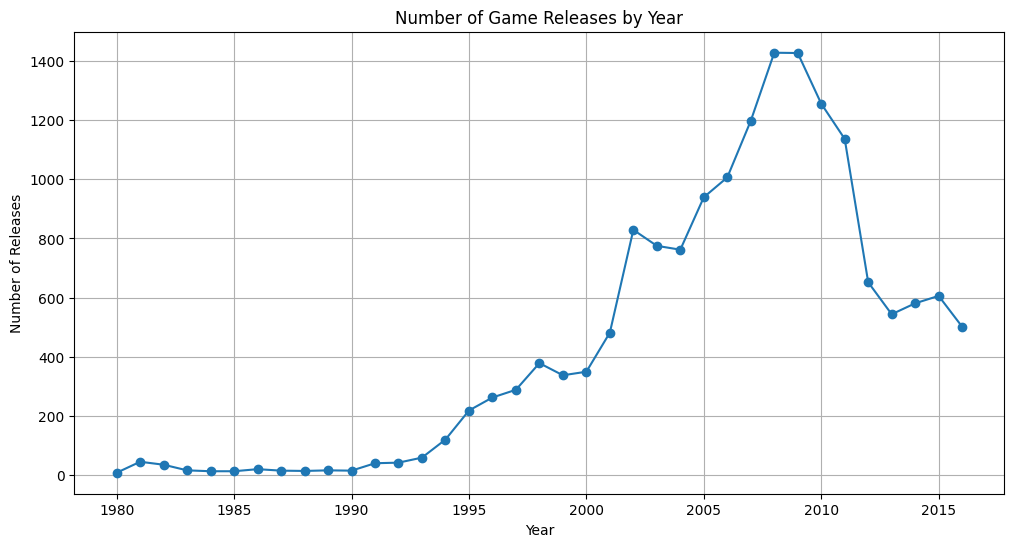

In [20]:
# Visualize the distribution of games across years
plt.figure(figsize=(12,6))
plt.plot(games_per_year["year_of_release"], games_per_year["game_count"], marker="o")
plt.title("Number of Game Releases by Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()

In [21]:
# Display summary statistics for each year

yearly_stats = (
    df.groupby("year_of_release")
      .agg(
          game_count   = ("name", "count"),       # number of releases
          total_sales  = ("global_sales", "sum"), # total global sales that year
          mean_sales   = ("global_sales", "mean"),# avg sales per game
          median_sales = ("global_sales", "median"),
          max_sales    = ("global_sales", "max"),
          min_sales    = ("global_sales", "min"),
          mean_critic  = ("critic_score", "mean"),
          mean_user    = ("user_score", "mean")
      )
      .reset_index()
      .sort_values("year_of_release")
)

print(yearly_stats)

    year_of_release  game_count  total_sales  mean_sales  median_sales  max_sales  min_sales  mean_critic  mean_user
0              1980           9        11.38    1.264444         0.770       4.31       0.23          NaN        NaN
1              1981          46        35.68    0.775652         0.465       4.50       0.13          NaN        NaN
2              1982          36        28.88    0.802222         0.540       7.81       0.14          NaN        NaN
3              1983          17        16.80    0.988235         0.770       3.20       0.16          NaN        NaN
4              1984          14        50.35    3.596429         1.485      28.31       0.27          NaN        NaN
5              1985          14        53.95    3.853571         1.015      40.24       0.02    59.000000   5.800000
6              1986          21        37.08    1.765714         1.360       6.50       0.30          NaN        NaN
7              1987          16        21.70    1.356250        

### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

### **Observations**

* Early Years (1980–1993)
  * Very low and relatively stable release counts.
  * Reflects the formative years of the industry, with limited platforms and smaller markets.
* Growth Phase (1993–2001)
  * Noticeable steady increase in annual releases.
* Acceleration (2001–2008)
  * Rapid growth with large year-over-year increases.
  * Peak around 2008–2009, with over 1,400 titles released annually.
* Decline (2009 onward)
  * Significant drop in releases after 2009.
* Prediction Potential (2017 and beyond)
  * The dataset has sufficient yearly coverage up to 2016.
  * The sharp decline post-2009 suggests a structural shift in the industry.

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [22]:
# Calculate total sales by platform and year
sales_by_platform_year = (
    df.groupby(["platform", "year_of_release"])["global_sales"]
      .sum()
      .reset_index()
      .sort_values(["platform", "year_of_release"])
)

print(sales_by_platform_year.head(10))

  platform  year_of_release  global_sales
0     2600             1980         11.38
1     2600             1981         35.68
2     2600             1982         28.88
3     2600             1983          5.84
4     2600             1984          0.27
5     2600             1985          0.45
6     2600             1986          0.67
7     2600             1987          1.94
8     2600             1988          0.74
9     2600             1989          0.63


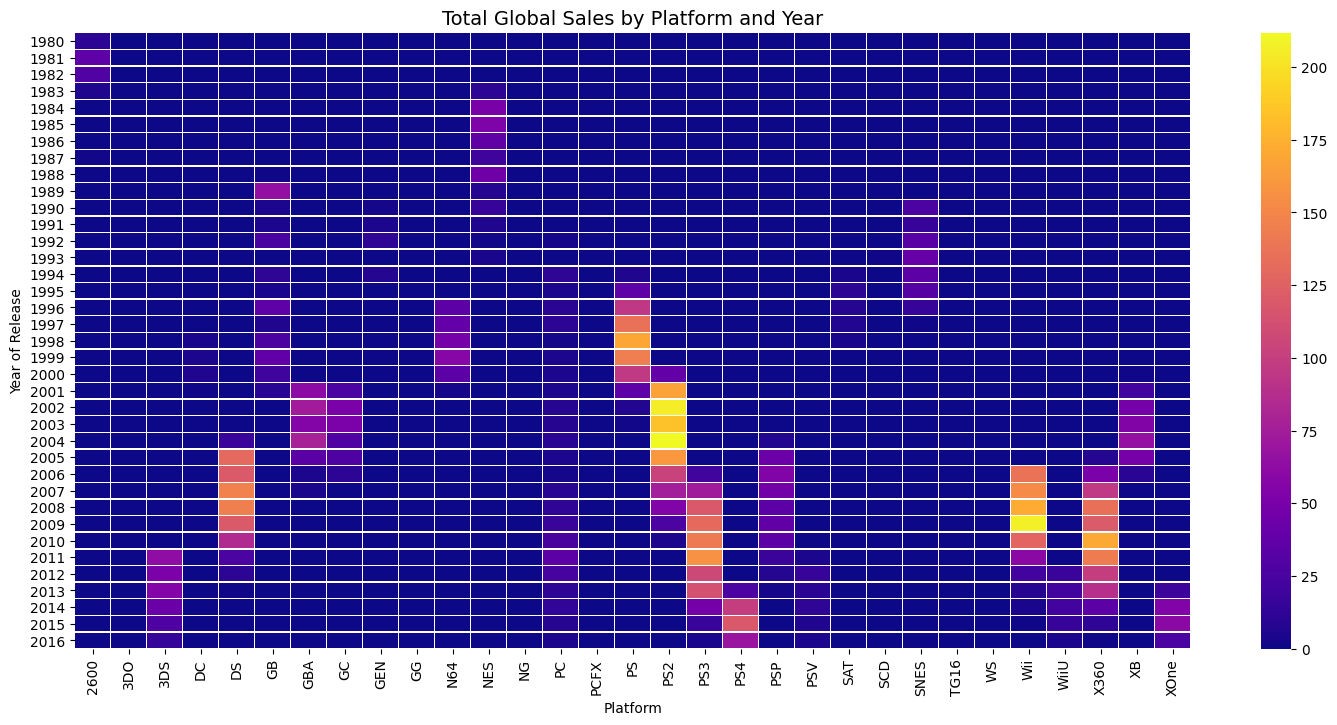

In [23]:
# Create a heatmap of platform sales over time

#Pivot so years are rows, platforms are columns
sales_pivot = sales_by_platform_year.pivot(
    index="year_of_release", 
    columns="platform", 
    values="global_sales"
).fillna(0)

# plot heatmap
plt.figure(figsize=(18,8))
sns.heatmap(sales_pivot, cmap="plasma", linewidths=0.3)

plt.title("Total Global Sales by Platform and Year", fontsize=14)
plt.xlabel("Platform")
plt.ylabel("Year of Release")
plt.show()

In [24]:
# Identify platforms with declining sales
platform_totals = (
    sales_by_platform_year.groupby("platform")["global_sales"].sum().sort_values(ascending=False)
)

declining = []

for platform in platform_totals.index:
    platform_data = sales_by_platform_year[sales_by_platform_year["platform"] == platform]
    if len(platform_data) > 5:  # ignore tiny platforms
        peak_year = platform_data.loc[platform_data["global_sales"].idxmax(), "year_of_release"]
        after_peak = platform_data[platform_data["year_of_release"] > peak_year]
        # Check if sales after peak mostly decline
        if (after_peak["global_sales"].diff().dropna() <= 0).mean() > 0.7:
            declining.append(platform)

print("Platforms with declining sales:", declining)

Platforms with declining sales: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', '3DS', 'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', '2600', 'WiiU', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG', 'PCFX']


In [25]:
#YoY change

sales_by_platform_year["sales_change"] = (
    sales_by_platform_year.groupby("platform")["global_sales"].diff()
)

print(sales_by_platform_year)

     platform  year_of_release  global_sales  sales_change
0        2600             1980         11.38           NaN
1        2600             1981         35.68         24.30
2        2600             1982         28.88         -6.80
3        2600             1983          5.84        -23.04
4        2600             1984          0.27         -5.57
...       ...              ...           ...           ...
1142     XOne             2012          0.00          0.00
1143     XOne             2013         18.96         18.96
1144     XOne             2014         54.07         35.11
1145     XOne             2015         60.14          6.07
1146     XOne             2016         26.15        -33.99

[1147 rows x 4 columns]


### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

### **Observations**
* No platform sustains growth forever: every one eventually declines.
* Some consoles barely register in the market, while others dominate but still disappear once replaced.
* The heatmap clearly demonstrates industry cycles, where innovation resets the trend (new console) but the decline phase always follows.
* Systems like Atari 2600, 3DO, Dreamcast (DC), Game Boy (GB), Genesis (GEN), Game Gear (GG), NeoGeo (NG), PC-FX, Saturn (SAT), Sega CD (SCD), TurboGrafx-16 (TG16), WonderSwan (WS) contributed only marginally.
* PlayStation Family: PS → PS2 → PS3 → PS4 shows clear transitions, with each generation overtaking the previous before eventually declining.
* Nintendo Consoles: Wii shows explosive growth around 2008, followed by Wii U’s much smaller impact.
* Xbox Line: Xbox → Xbox 360 → Xbox One has the same rise-and-fall lifecycle.

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [26]:
# Your code here to filter the dataset to relevant years

relevant_years = [2005, 2006, 2007, 2008,2009,2010,2011,2012,2013,2014,2015,2016]
df_relevant = df[df['year_of_release'].isin(relevant_years)]

print (df_relevant.info())

# Justify your choice with data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11271 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             11271 non-null  object  
 1   platform         11271 non-null  category
 2   year_of_release  11271 non-null  Int64   
 3   genre            11271 non-null  category
 4   na_sales         11271 non-null  float64 
 5   eu_sales         11271 non-null  float64 
 6   jp_sales         11271 non-null  float64 
 7   other_sales      11271 non-null  float64 
 8   critic_score     5644 non-null   float64 
 9   user_score       5537 non-null   float64 
 10  raiting          7309 non-null   category
 11  global_sales     11271 non-null  float64 
dtypes: Int64(1), category(3), float64(7), object(1)
memory usage: 926.6+ KB
None


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

### **Answers**
* The data selected was:2005–2016 It includes the rapid growth, peak, and decline phases.
* Best reflects the current market structure (consoles, digital transition, mobile impact). Captures the downward momentum needed for accurate short-term forecasting.
* Since 2005 allows access to the rapid growth inflex and decline that can be very useful, but spearing 1993 to 2004 that adds context about the industry’s rise, but might overweight early growth, and 1993 and before where the industry environment was different.
* Since 2005, the data captures the industry’s rapid growth, inflection, and decline—providing valuable insight. Separating 1993–2004 adds context about the rise of gaming, though it may overemphasize early growth, while data from 1993 and earlier reflects a very different industry landscape.


## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [27]:
# Analyze platform sales trends
platform_trends = (
    df_relevant.groupby(["year_of_release", "platform"])
    .agg(
        total_sales=("global_sales", "sum"),
        game_count=("name", "count")
    )
    .reset_index()
)
print(platform_trends)

     year_of_release platform  total_sales  game_count
0               2005     2600         0.00           0
1               2005      3DO         0.00           0
2               2005      3DS         0.00           0
3               2005       DC         0.00           0
4               2005       DS       130.14         118
..               ...      ...          ...         ...
367             2016      Wii         0.18           1
368             2016     WiiU         4.60          14
369             2016     X360         1.52          13
370             2016       XB         0.00           0
371             2016     XOne        26.15          87

[372 rows x 4 columns]


In [28]:
platform_totals = (
    df_relevant.groupby("platform")["global_sales"]
    .sum()
# Sort platforms by total sales
    .sort_values(ascending=False)
)
print(platform_totals.head(10))

platform
X360    961.24
PS3     931.33
Wii     891.18
DS      785.49
PS2     426.46
PS4     314.14
PSP     282.47
3DS     257.81
PC      167.79
XOne    159.32
Name: global_sales, dtype: float64


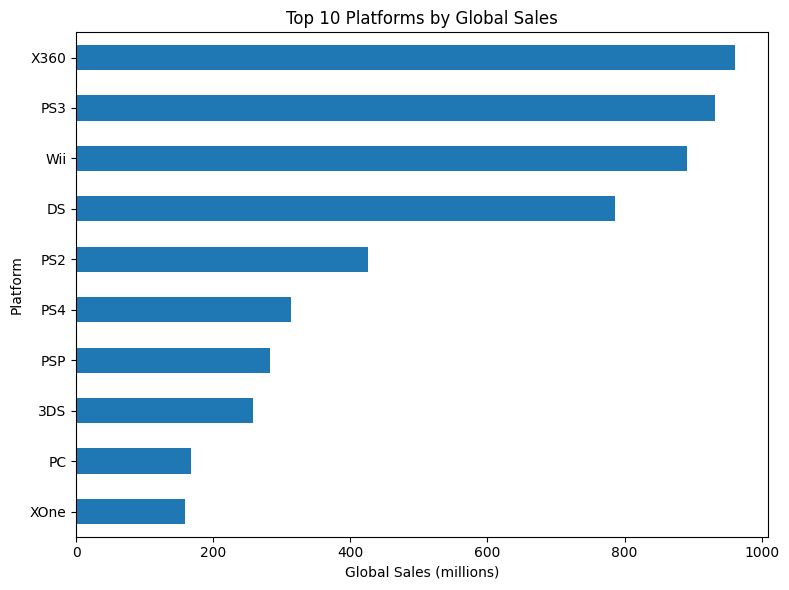

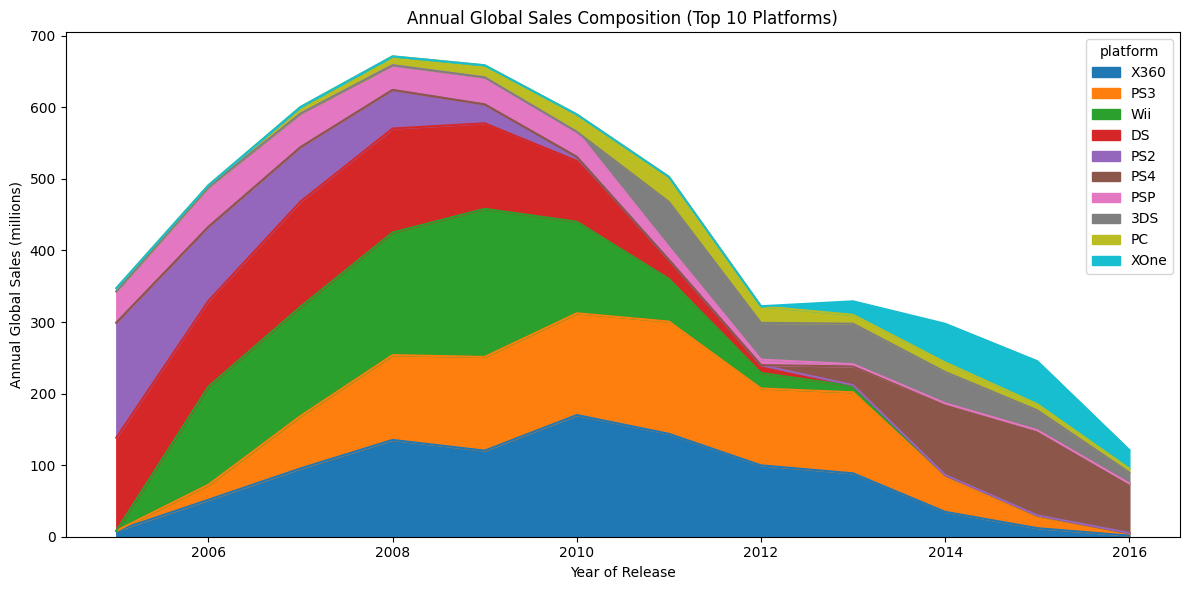

In [29]:
# Visualize top platforms 1
top10_totals = platform_totals.nlargest(10) 
top10_platforms = top10_totals.index.tolist()           

ax = top10_totals.sort_values(ascending=True).plot(
    kind="barh", figsize=(8,6)
)
ax.set_title("Top 10 Platforms by Global Sales")
ax.set_xlabel("Global Sales (millions)")
ax.set_ylabel("Platform")
plt.tight_layout()
plt.show()


#Visualize top platforms 2
filtered_trends = platform_trends[platform_trends["platform"].isin(top10_platforms)]

platform_growth_pivot = (
    filtered_trends
    .pivot_table(
        index="year_of_release",
        columns="platform",
        values="total_sales",
        aggfunc="sum",
        fill_value=0
    )
    .sort_index()
    .reindex(columns=top10_platforms)   # keep same platform order as totals
)

ax = platform_growth_pivot.plot.area(figsize=(12,6))
ax.set_title("Annual Global Sales Composition (Top 10 Platforms)")
ax.set_xlabel("Year of Release")
ax.set_ylabel("Annual Global Sales (millions)")
plt.tight_layout()
plt.show()


### **Observations**

**Top 10 Platforms by Global Sales**
* Total sales, global between 2005 and 2016.

**Annual Global Sales Composition (Top 10 Platforms)** 

* 2005–2008: Huge growth, driven by Wii, DS, X360, PS3.
* 2008–2010: Peak global sales.
* After 2010: Decline of DS/Wii generation, slow transition to PS4/XOne.
* 2014 onward: Sales shrink compared to peak, though PS4/XOne provide a late bump.


In [30]:
# Calculate year-over-year growth for each platform
print(platform_growth_pivot)

yoy_growth = platform_growth_pivot.pct_change(fill_method=None) * 100
yoy_growth = yoy_growth.replace([np.inf, -np.inf], np.nan).round(2)
print(yoy_growth)




platform           X360     PS3     Wii      DS     PS2     PS4    PSP    3DS     PC   XOne
year_of_release                                                                            
2005               8.25    0.00    0.00  130.14  160.66    0.00  43.84   0.00   4.37   0.00
2006              51.62   20.96  137.15  119.81  103.42    0.00  55.32   0.00   2.85   0.00
2007              95.41   73.19  152.77  146.94   75.99    0.00  46.93   0.00   9.28   0.00
2008             135.26  118.52  171.32  145.31   53.90    0.00  34.55   0.00  12.42   0.00
2009             120.29  130.93  206.97  119.54   26.40    0.00  37.78   0.00  16.91   0.00
2010             170.03  142.17  127.95   85.02    5.64    0.00  35.04   0.00  24.28   0.00
2011             143.84  156.78   59.65   26.18    0.45    0.00  17.82  63.20  35.03   0.00
2012              99.74  107.35   21.71   11.01    0.00    0.00   7.69  51.36  23.22   0.00
2013              88.58  113.25    8.59    1.54    0.00   25.99   3.14  56.57  1

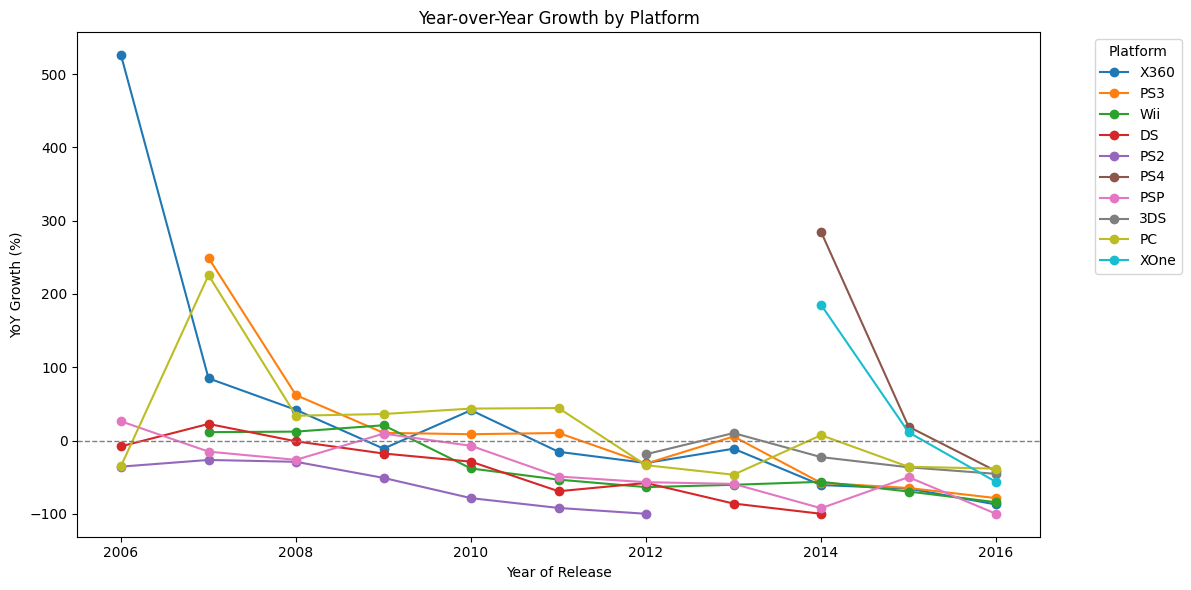

In [31]:
#Visualize platform growth rates

plt.figure(figsize=(12, 6))
for col in yoy_growth.columns:
    plt.plot(yoy_growth.index, yoy_growth[col], marker="o", label=col)

plt.title("Year-over-Year Growth by Platform")
plt.xlabel("Year of Release")
plt.ylabel("YoY Growth (%)")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### **Observations**
* Early spikes = console adoption period.
* Flat near 0% = mature phase (steady sales).
* Negative dips = decline as players move on to new platforms.
* Industry as a whole moves in waves, matching the console life cycles.

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

<Figure size 640x480 with 0 Axes>

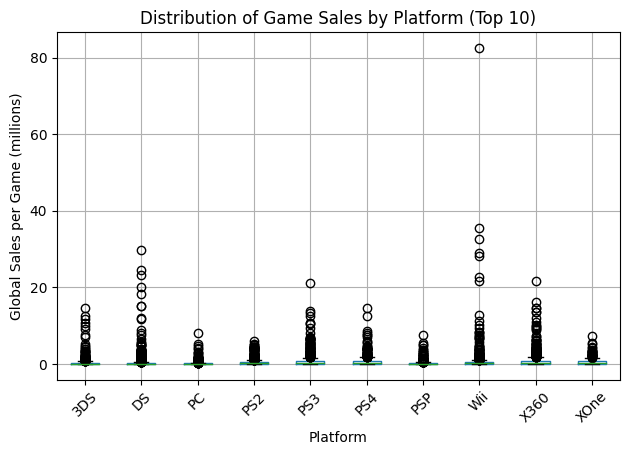

In [32]:
# Create box plot of sales by platform
df_top10 = df_relevant[df_relevant["platform"].isin(top10_platforms)].copy()
df_top10["platform"] = df_top10["platform"].astype(str)

# Plot
plt.figure()
ax = df_top10.boxplot(
    column="global_sales", 
    by="platform", 
    grid=True, 
    showfliers=True
)
plt.title("Distribution of Game Sales by Platform (Top 10)")
plt.suptitle("") 
plt.xlabel("Platform")
plt.ylabel("Global Sales per Game (millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observation

Most games actually sell under a million copies, but a few huge hits sold 20–80 million and stretch the scale way out. That makes the boxes in the plot look squished at the bottom. Since the box shows where the middle 50% of the games are, I zoomed in to just 0–5 million sales so we can actually see the typical range more clearly.

<Figure size 640x480 with 0 Axes>

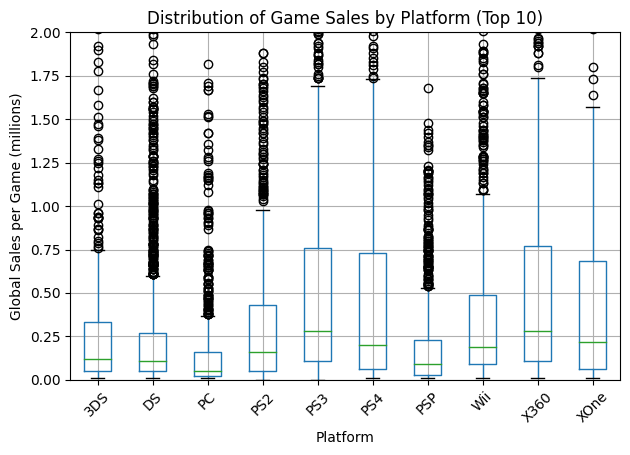

In [33]:
# Plotting a "close up" of up to 2 million

plt.figure()
ax = df_top10.boxplot(
    column="global_sales", 
    by="platform", 
    grid=True, 
    showfliers=True
)
plt.title("Distribution of Game Sales by Platform (Top 10)")
plt.suptitle("") 
plt.xlabel("Platform")
plt.ylabel("Global Sales per Game (millions)")
plt.xticks(rotation=45)
plt.ylim(0,2)
plt.tight_layout()
plt.show()

### **Observations**
* Looking at the full scale there are big outliers (Wii Sports, DS, PS3,PS4, X360). However, majority of games sold less than 2 million copies.
* Wii has one extreme outlier >80 million
* DS also shows outliers above 20 million
* Platforms like PS3, PS4, Xbox 360, and Wii have higher medians, meaning they had more games consistently selling in the mid-range. Meanwhile, PC, PSP, and DS had several low-sellers with only a few breakout hits.


In [34]:
# Calculate detailed statistics for each platform

# Filter only top 10 platforms
df_top10 = df_relevant[df_relevant["platform"].isin(top10_platforms)].copy()
df_top10["platform"] = df_top10["platform"].astype(str)

# Describe
stats = df_top10.groupby("platform")["global_sales"].describe()

# Add extra metrics
stats["median"] = df_top10.groupby("platform")["global_sales"].median()
stats["variance"] = df_top10.groupby("platform")["global_sales"].var()
stats["skewness"] = df_top10.groupby("platform")["global_sales"].skew()
stats["kurtosis"] = df_top10.groupby("platform")["global_sales"].apply(pd.Series.kurtosis)
stats = stats.round(2)

print(stats)

           count  mean   std   min   25%   50%   75%    max  median  variance  skewness  kurtosis
platform                                                                                         
3DS        512.0  0.50  1.44  0.01  0.05  0.12  0.33  14.60    0.12      2.08      6.34     46.38
DS        2097.0  0.37  1.43  0.01  0.05  0.11  0.27  29.80    0.11      2.04     12.82    201.97
PC         813.0  0.21  0.53  0.01  0.02  0.05  0.16   8.01    0.05      0.29      7.50     79.62
PS2       1065.0  0.40  0.71  0.00  0.05  0.16  0.43   5.95    0.16      0.50      3.93     18.46
PS3       1305.0  0.71  1.40  0.00  0.11  0.28  0.76  21.05    0.28      1.97      6.18     57.16
PS4        392.0  0.80  1.61  0.01  0.06  0.20  0.73  14.63    0.20      2.59      4.30     24.94
PSP       1178.0  0.24  0.52  0.01  0.03  0.09  0.23   7.68    0.09      0.27      6.77     64.66
Wii       1286.0  0.69  3.17  0.01  0.09  0.19  0.49  82.54    0.19     10.02     17.09    379.75
X360      1232.0  0.

### **Observations**

* A small number of titles (Wii and DS) dominate total sales.
* PS3/X360/PS4 ecosystems were healthier overall: higher medians and means, less extreme skew, more consistent hits.
* PC & PSP show the weakest retail presence: most titles sell in the very low range.
* Wii is the most extreme: massive outliers drive variance, skewness, and kurtosis.

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [35]:
# Choose a popular platform based on your previous analysis
ps2 = df_relevant[df_relevant["platform"] == "PS2"].copy()
print(ps2)

                                                   name platform  year_of_release         genre  na_sales  eu_sales  \
148                                   Final Fantasy XII      PS2             2006  Role-Playing      1.88      0.00   
196                                      Guitar Hero II      PS2             2006          Misc      3.81      0.63   
208                    Guitar Hero III: Legends of Rock      PS2             2007          Misc      3.49      0.01   
213                                       Madden NFL 06      PS2             2005        Sports      3.98      0.26   
241                                       Madden NFL 07      PS2             2006        Sports      3.63      0.24   
...                                                 ...      ...              ...           ...       ...       ...   
16670      Sugar + Spice! Anoko no Suteki na Nanimokamo      PS2             2008     Adventure      0.00      0.00   
16671                                    Kanokon

In [36]:
# Create scatter plots for both critic and user scores
ps2_scores = ps2[["critic_score", "user_score"]].describe()
print(ps2_scores)


       critic_score  user_score
count    456.000000  473.000000
mean      67.271930    7.480761
std       12.946914    1.380260
min       27.000000    1.700000
25%       58.000000    6.800000
50%       69.000000    7.900000
75%       77.000000    8.500000
max       96.000000    9.300000


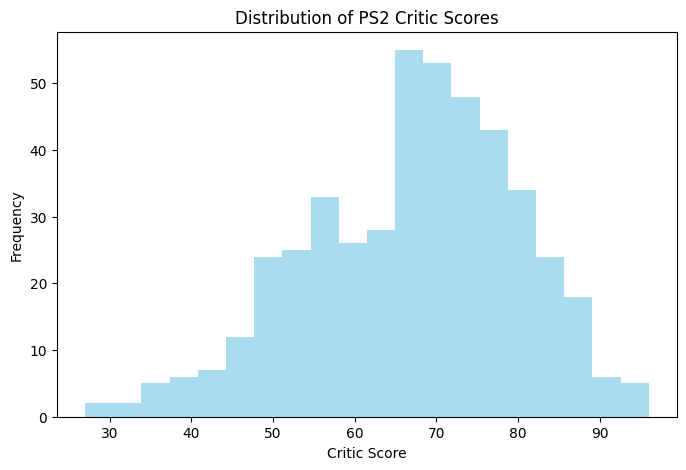

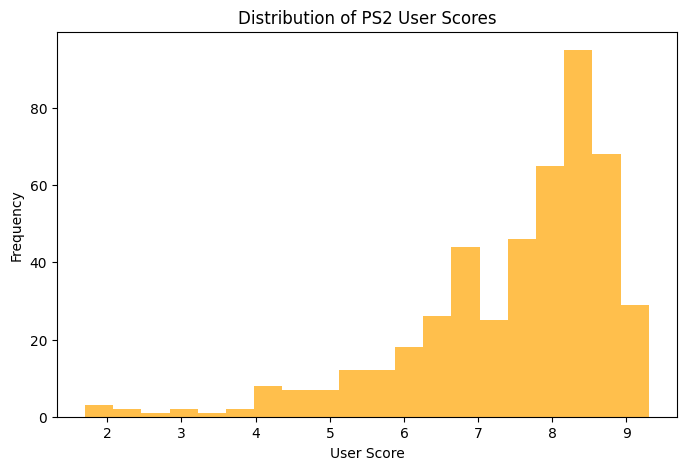

              global_sales  critic_score  user_score
global_sales      1.000000      0.424858    0.190395
critic_score      0.424858      1.000000    0.499420
user_score        0.190395      0.499420    1.000000


In [37]:
# Critic Scores

plt.figure(figsize=(8,5))
ps2["critic_score"].dropna().plot(kind="hist", bins=20, alpha=0.7, color="skyblue")
plt.title("Distribution of PS2 Critic Scores")
plt.xlabel("Critic Score")
plt.ylabel("Frequency")
plt.show()

# User Scores
plt.figure(figsize=(8,5))
ps2["user_score"].dropna().plot(kind="hist", bins=20, alpha=0.7, color="orange")
plt.title("Distribution of PS2 User Scores")
plt.xlabel("User Score")
plt.ylabel("Frequency")
plt.show()

# Calculate correlations
ps2_scores = ps2.copy()
ps2_scores["user_score"] =ps2_scores["user_score"] * 10  # now 0–100 like critics

# Compute correlation matrix
correlations = ps2_scores[["global_sales", "critic_score", "user_score"]].corr()
print(correlations)

### **Observations**

* User scores and global sales have very low correlation
* Critic score and global sales have a moderate correlation
* Critic scores and user scores have a moderate correlation

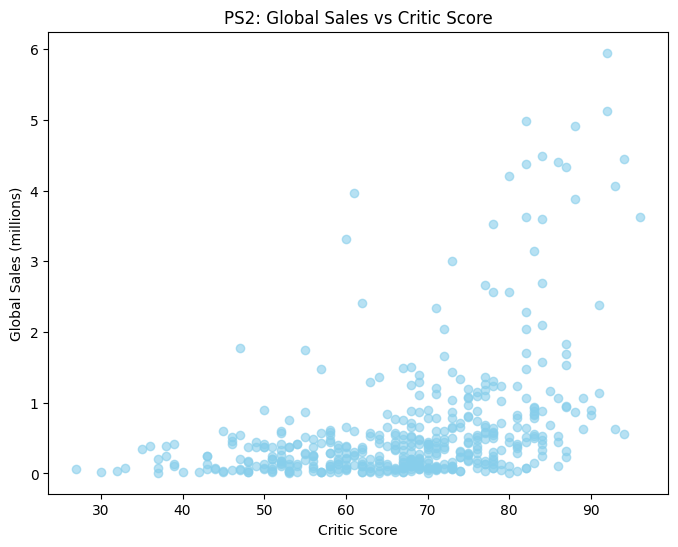

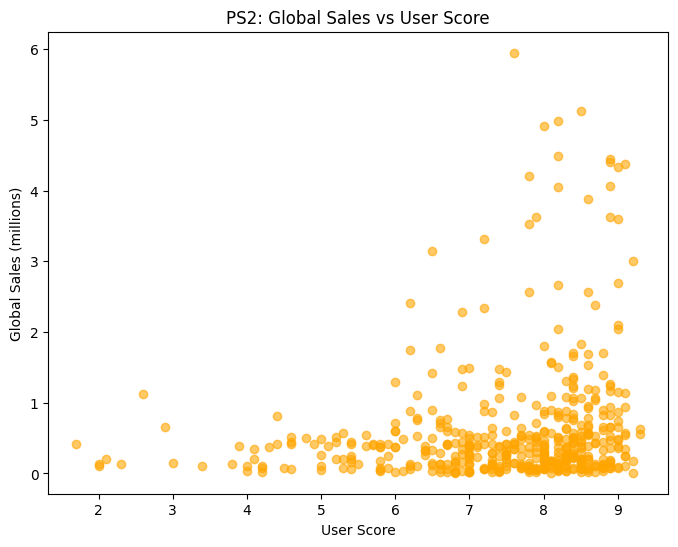

In [38]:
# Critic scores vs global sales
plt.figure(figsize=(8,6))
plt.scatter(ps2["critic_score"], ps2["global_sales"], alpha=0.6, color="skyblue")
plt.title("PS2: Global Sales vs Critic Score")
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (millions)")
plt.show()

# User scores vs global sales
plt.figure(figsize=(8,6))
plt.scatter(ps2["user_score"], ps2["global_sales"], alpha=0.6, color="orange")
plt.title("PS2: Global Sales vs User Score")
plt.xlabel("User Score")
plt.ylabel("Global Sales (millions)")
plt.show()

### **Observations**

* There is low correlation between the global sales and user scores. And a moderate correlation of the global sales with the critic scores.
* If there were stronger correlations, the dots would form a rising pattern from the bottom-left corner to the upper right corner.
* PS2 games sales were not highly impacted by user or critic scores.

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [39]:
# Find games released on multiple platforms

# Count how many platforms each game was released on
multi_platform = (
    df_relevant.groupby("name")["platform"]
    .nunique()
    .reset_index(name="platform_count")
)

# Keep only games with >1 platform
multi_platform = multi_platform[multi_platform["platform_count"] > 1]

# Merge back with original df to get platform list
multi_platform_games = df_relevant[df_relevant["name"].isin(multi_platform["name"])]

# For each game, list platforms
platforms_per_game = (
    multi_platform_games.groupby("name")["platform"]
    .unique()
    .reset_index()
)
# sortby number of platforms, most multi-platform first
platforms_per_game["platform_count"] = platforms_per_game["platform"].apply(len)
platforms_per_game = platforms_per_game.sort_values("platform_count", ascending=False)

print(platforms_per_game.head(10))

                             name                                           platform  platform_count
1171  Need for Speed: Most Wanted  ['PS2', 'PS3', 'X360', 'XB', 'PSV', 'GC', 'PC'...              10
858      LEGO Marvel Super Heroes  ['X360', 'PS3', 'PS4', 'XOne', '3DS', 'WiiU', ...               9
1330                  Ratatouille  ['DS', 'PS2', 'PSP', 'PS3', 'Wii', 'X360', 'GB...               9
545                       FIFA 14  ['PS3', 'X360', 'PS4', 'XOne', 'PSV', 'PC', 'W...               9
867               LEGO The Hobbit  ['PS4', 'PS3', 'X360', 'XOne', '3DS', 'WiiU', ...               8
57          Angry Birds Star Wars  ['3DS', 'PS3', 'X360', 'Wii', 'PS4', 'XOne', '...               8
940                 Madden NFL 08  ['PS2', 'X360', 'PS3', 'Wii', 'PSP', 'XB', 'DS...               8
939                 Madden NFL 07  ['PS2', 'X360', 'XB', 'GC', 'PS3', 'Wii', 'DS'...               8
546                       FIFA 15  ['PS4', 'PS3', 'X360', 'XOne', 'PSV', 'Wii', '...       

In [40]:
# Compare sales across platforms for these games

# Add a column with number of platforms per game
platforms_per_game["platform_count"] = platforms_per_game["platform"].apply(len)

# Sort and select top 10 most cross-platform
top10_crossplatform_games = platforms_per_game.sort_values(
    "platform_count", ascending=False
).head(10)

# Keep only rows for these 10 games
multi_sales_top10 = df_top10[df_top10["name"].isin(top10_crossplatform_games["name"])]

# Pivot: game x platform with global_sales as values
sales_pivot = (
    multi_sales_top10
    .pivot_table(
        index="name",
        columns="platform",
        values="global_sales",
        aggfunc="sum",
        fill_value=0
    )
    .reset_index()
)
print(sales_pivot)


platform                                     name   3DS    DS    PC   PS2   PS3   PS4   PSP   Wii  X360  XOne
0                                            Cars  0.00  0.96  0.00  1.21  0.00  0.00  1.20  0.93  0.25  0.00
1                                         FIFA 14  0.23  0.00  0.40  0.00  6.46  3.01  0.19  0.38  4.22  1.16
2                                  FIFA Soccer 13  0.29  0.00  0.40  0.00  8.17  0.00  0.34  0.69  5.16  0.00
3                        LEGO Marvel Super Heroes  0.89  0.38  0.17  0.00  1.83  1.62  0.00  0.00  2.22  1.05
4         LEGO Star Wars II: The Original Trilogy  0.00  1.07  0.01  2.69  0.00  0.00  1.40  0.00  0.63  0.00
5                    Lego Batman 3: Beyond Gotham  0.45  0.00  0.06  0.00  0.73  0.92  0.00  0.00  0.89  0.44
6                     Need for Speed: Most Wanted  0.00  0.27  0.37  4.37  2.81  0.00  0.00  0.00  2.81  0.00
7                                     Ratatouille  0.00  1.25  0.02  0.84  0.51  0.00  0.65  0.50  0.27  0.00
8         

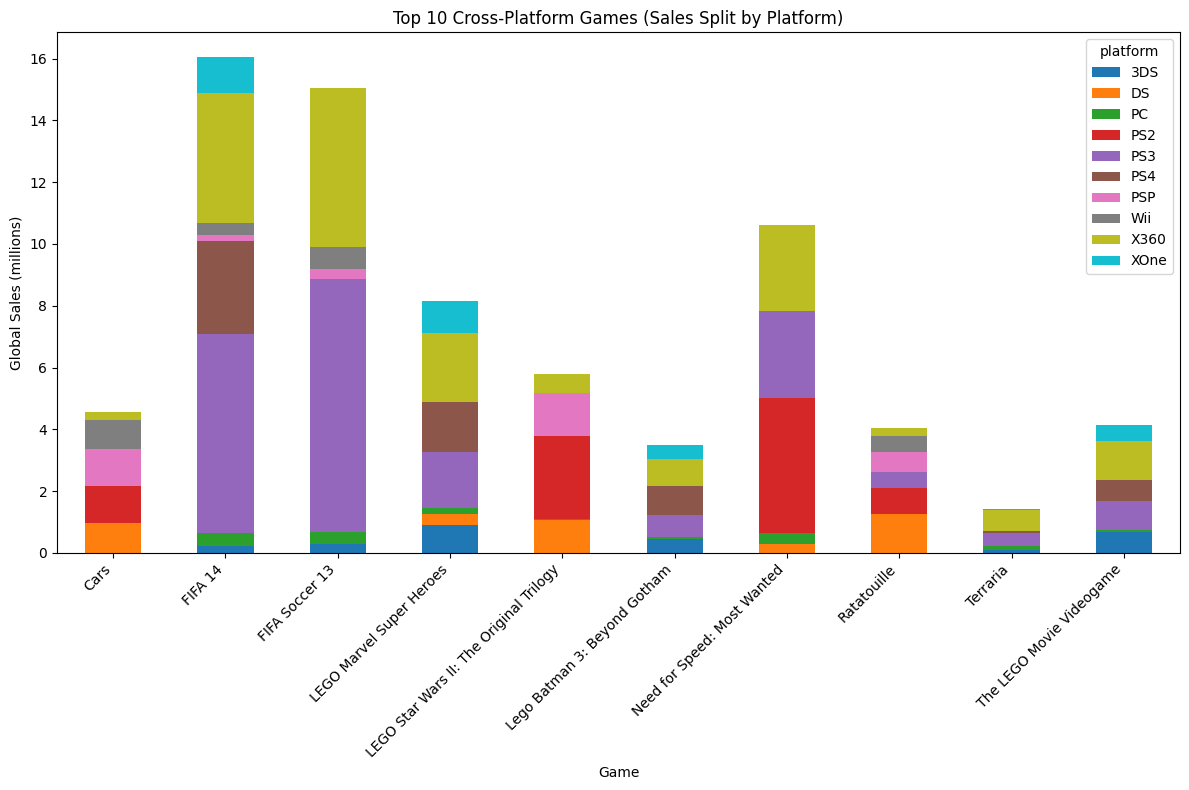

In [41]:
# Your code here to analyze and visualize cross-platform performance

sales_pivot.set_index("name").plot(
    kind="bar", stacked=True, figsize=(12,8)
)
plt.title("Top 10 Cross-Platform Games (Sales Split by Platform)")
plt.xlabel("Game")
plt.ylabel("Global Sales (millions)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [42]:
#Best selling games regardless of the platform
best_sellers = (
    df_relevant.groupby("name")["global_sales"]
    .sum()
    .reset_index()
    .sort_values("global_sales", ascending=False)
    .head(10)
)

print(best_sellers)


                                name  global_sales
7107                      Wii Sports         82.54
2346              Grand Theft Auto V         56.58
3639                  Mario Kart Wii         35.52
7109               Wii Sports Resort         32.77
802   Call of Duty: Modern Warfare 3         30.60
4354           New Super Mario Bros.         29.80
798       Call of Duty: Black Ops II         29.40
796          Call of Duty: Black Ops         29.20
7105                        Wii Play         28.91
4357       New Super Mario Bros. Wii         28.32


### **Observations**

* 4 out of the top 10 are LEGO titles. Sales are not outstanding individually, but the strategy gave them consistent presence across platforms.
* Fifa has 2 games in the top 10 multiplatform.
* In most bars, purple (PS3) and yellow (X360) take up the largest share.
* Even though these games are on many platforms, total sales per game (~5–16M at most) and when we compare it with the top seller videogames, multiplatform sales won't always guarantee exceptional sales. 

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [43]:
# Analyze genre performance
# Sort genres by total sales
genre_sales = (
    df_relevant.groupby("genre")["global_sales"]
    .sum()
    .reset_index()
    .sort_values("global_sales", ascending=False)
)

print(genre_sales.head(10))

           genre  global_sales
0         Action       1202.04
10        Sports        853.33
8        Shooter        758.56
3           Misc        615.83
7   Role-Playing        550.78
6         Racing        355.03
4       Platform        303.06
9     Simulation        269.62
2       Fighting        208.07
1      Adventure        149.81


In [44]:
# Average sales per game - Sometimes a genre has high totals just because it has many games.
genre_avg_sales = (
    df_relevant.groupby("genre")["global_sales"]
    .mean()
    .reset_index()
    .sort_values("global_sales", ascending=False)
)

print(genre_avg_sales)

           genre  global_sales
8        Shooter      0.910636
4       Platform      0.716454
10        Sports      0.617460
6         Racing      0.556473
7   Role-Playing      0.516195
0         Action      0.466993
2       Fighting      0.456294
3           Misc      0.450168
9     Simulation      0.418665
5         Puzzle      0.276391
11      Strategy      0.185829
1      Adventure      0.140667


In [45]:
#Count of games by genre
genre_counts = (
    df_relevant["genre"].value_counts()
    .reset_index()
    .rename(columns={"index": "genre", "genre": "game_count"})
)

print(genre_counts)

           genre  game_count
0         Action        2574
1         Sports        1382
2           Misc        1368
3   Role-Playing        1067
4      Adventure        1065
5        Shooter         833
6     Simulation         644
7         Racing         638
8       Fighting         456
9       Platform         423
10      Strategy         422
11        Puzzle         399


genre            Action  Adventure  Fighting   Misc  Platform  Puzzle  Racing  Role-Playing  Shooter  Simulation  \
year_of_release                                                                                                    
2005              85.39       8.46     19.65  60.97     23.32   20.36   56.03         28.38    41.52       48.97   
2006              66.06      11.36     22.42  66.97     49.29   10.74   33.81         57.37    38.24       21.52   
2007             104.85      24.13     17.49  91.46     35.07   23.56   38.78         43.46    70.61       48.35   
2008             134.96      24.63     35.02  86.06     35.13   15.23   70.04         58.98    59.16       46.11   
2009             137.69      20.23     31.90  75.81     40.53   19.79   33.69         47.31    69.29       32.92   
2010             115.29      15.96     14.69  95.14     31.04   10.75   34.37         69.65    76.83       21.49   
2011             116.68      15.61     22.41  54.38     27.68    4.96   

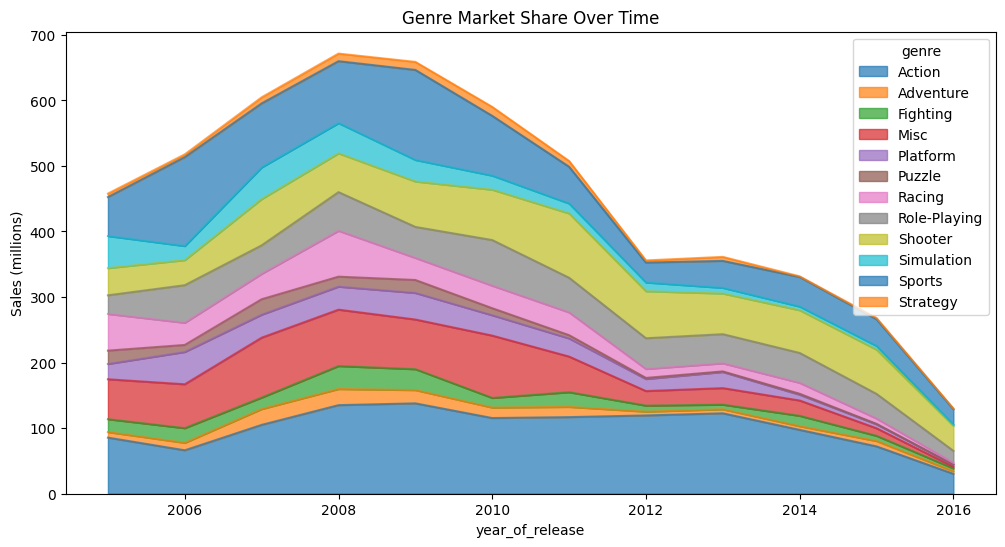

In [46]:
#Trends over time
genre_trends = (
    df_relevant.groupby(["year_of_release", "genre"])["global_sales"]
    .sum()
    .reset_index()
)

trends_pivot = genre_trends.pivot(index="year_of_release", columns="genre", values="global_sales").fillna(0)

print(trends_pivot)

trends_pivot.plot.area(figsize=(12,6), alpha=0.7)
plt.title("Genre Market Share Over Time")
plt.ylabel("Sales (millions)")
plt.show()


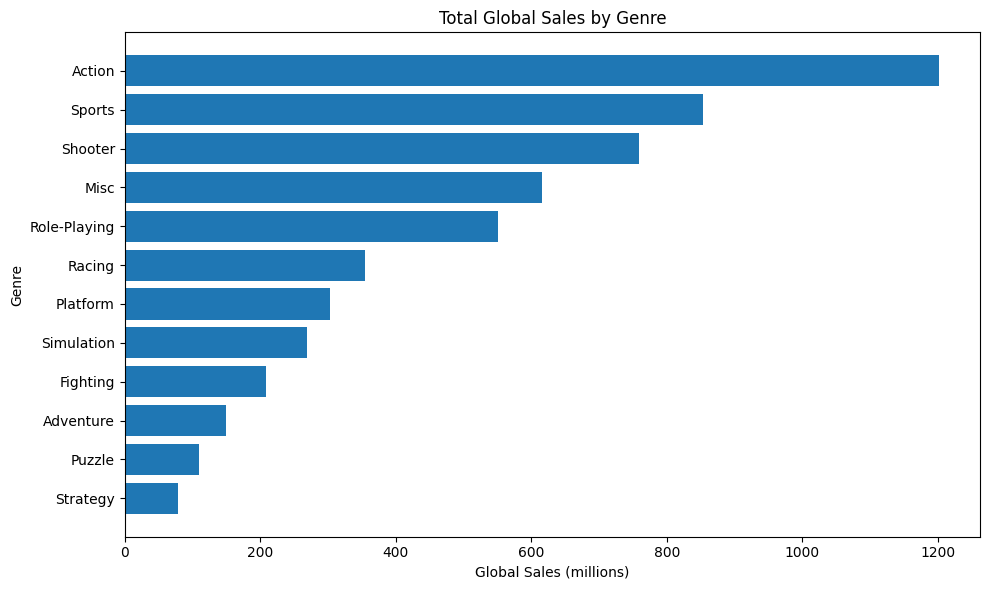

In [47]:
# Visualize genre distribution
plt.figure(figsize=(10,6))
plt.barh(genre_sales["genre"], genre_sales["global_sales"])
plt.gca().invert_yaxis()
plt.title("Total Global Sales by Genre")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [48]:
# Calculate market share for each genre

# Total sales by genre
genre_sales = (
    df_relevant.groupby("genre")["global_sales"]
    .sum()
    .reset_index()
)

# Grand total of all sales
total_sales = genre_sales["global_sales"].sum()

# Add market share %
genre_sales["market_share"] = (genre_sales["global_sales"] / total_sales) * 100

# Sort from biggest to smallest
genre_sales = genre_sales.sort_values("market_share", ascending=False)

print(genre_sales)

           genre  global_sales  market_share
0         Action       1202.04     22.036250
10        Sports        853.33     15.643567
8        Shooter        758.56     13.906208
3           Misc        615.83     11.289628
7   Role-Playing        550.78     10.097107
6         Racing        355.03      6.508544
4       Platform        303.06      5.555810
9     Simulation        269.62      4.942775
2       Fighting        208.07      3.814418
1      Adventure        149.81      2.746373
5         Puzzle        110.28      2.021695
11      Strategy         78.42      1.437625


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

### **Observations**

* Action is the genre with the most video games and the highest total sales. However, it doesn’t have the best average sales per game. This suggests its dominance comes from the sheer number of titles on the market rather than individual performance.
* Shooter leads in average sales per game and ranks in the top 3 for market share.
* Sports also ranks in the top 3 for market share, global sales, and average sales per game, making it a consistently strong performer.
* While every genre was hit by the industry-wide decline after 2010, the impact was stronger for smaller genres, which almost vanished by 2016. Bigger genres like Action, Sports, and Shooter held up longer but eventually fell too.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

   platform  na_sales  eu_sales  jp_sales  other_sales  global_sales
3        DC      0.00      0.00      0.06         0.00          0.06
7        GC     27.97      7.47      2.78         0.93         39.15
6       GBA     26.85     10.19      4.78         0.72         42.54
20      PSV     12.47     13.07     21.84         6.43         53.81
29       XB     42.85     14.90      0.02         2.08         59.85
27     WiiU     38.10     25.13     13.01         5.95         82.19
30     XOne     93.12     51.59      0.34        14.27        159.32
13       PC     45.84    103.01      0.00        18.94        167.79
2       3DS     82.65     61.27    100.62        13.27        257.81
19      PSP    105.02     63.92     73.85        39.68        282.47
18      PS4    108.74    141.09     15.96        48.35        314.14
16      PS2    200.49     87.14     50.98        87.85        426.46
4        DS    371.98    184.48    171.35        57.68        785.49
26      Wii    486.87    258.32   

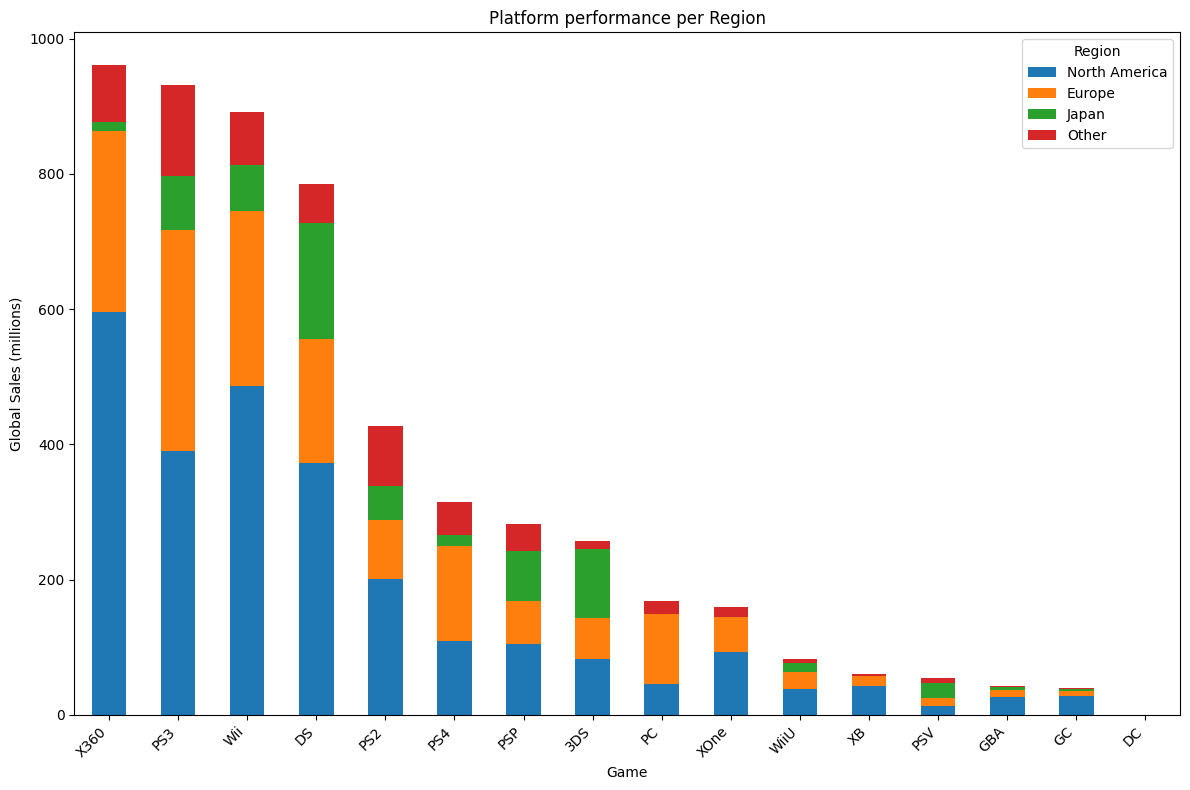

In [49]:
# Function to analyze platform performance by region

platform_region_sales = df_relevant.groupby("platform")[["na_sales","eu_sales","jp_sales","other_sales", "global_sales"]].sum().reset_index().sort_values("global_sales", ascending=False)

platform_region_sales=platform_region_sales = platform_region_sales[
    ~( (platform_region_sales["na_sales"] == 0) &
       (platform_region_sales["eu_sales"] == 0) &
       (platform_region_sales["jp_sales"] == 0) &
       (platform_region_sales["other_sales"] == 0) )
]
print(platform_region_sales.sort_values("global_sales", ascending=True))

platform_region_sales_plot=platform_region_sales[["platform","na_sales","eu_sales","jp_sales", "other_sales"]]
    
platform_region_sales_plot.set_index("platform").plot(
    kind="bar", stacked=True, figsize=(12,8)
)
plt.title("Platform performance per Region")
plt.xlabel("Game")
plt.ylabel("Global Sales (millions)")
plt.xticks(rotation=45, ha="right")
plt.legend(
    ["North America", "Europe", "Japan", "Other"], 
    title="Region"
)
plt.tight_layout()
plt.show()

In [50]:
#Sumatory 
total_global_sales= platform_region_sales["global_sales"].sum()
print(f'Total global sales:{total_global_sales.round(2)}')

top_5_platforms= platform_region_sales.head(5).copy()

top_5_platforms_sales=top_5_platforms["global_sales"].sum()
print(f'Top 5 platforms sales:{top_5_platforms_sales.round(2)}')

top5_plat_sales_share=(top_5_platforms_sales/total_global_sales)*100
print(f'Percentage of top 5 platforms over the total sales:{top5_plat_sales_share.round(2)}%')

Total global sales:5454.83
Top 5 platforms sales:3995.7
Percentage of top 5 platforms over the total sales:73.25%


### Observations

* Global sales of the top 5 platforms combined make over 73% of the market share.

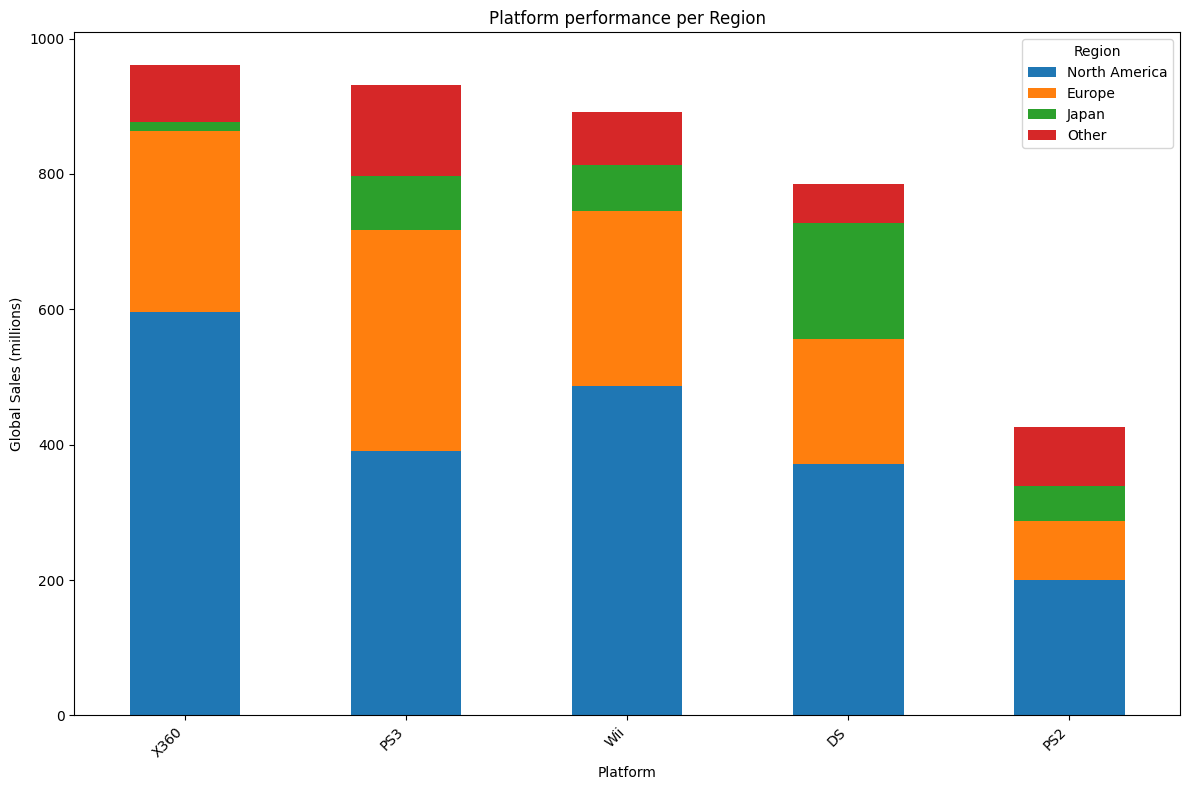

In [51]:
#Close up to the top 5
top_5_platforms_plot=top_5_platforms[["platform","na_sales","eu_sales","jp_sales", "other_sales"]]

top_5_platforms_plot.set_index("platform").plot(
    kind="bar", stacked=True, figsize=(12,8)
)
plt.title("Platform performance per Region")
plt.xlabel("Platform")
plt.ylabel("Global Sales (millions)")
plt.xticks(rotation=45, ha="right")
plt.legend(
    ["North America", "Europe", "Japan", "Other"], 
    title="Region"
)
plt.tight_layout()
plt.show()

In [52]:
# Region Market Shares -top 5 platforms
for region in ["na_sales", "eu_sales", "jp_sales", "other_sales"]:
    top_5_platforms[region.replace("_sales", "_share")] = (top_5_platforms[region] / top_5_platforms["global_sales"]) * 100

top_5_platforms=top_5_platforms.round(2)

print(top_5_platforms)

   platform  na_sales  eu_sales  jp_sales  other_sales  global_sales  na_share  eu_share  jp_share  other_share
28     X360    595.74    268.32     12.30        84.88        961.24     61.98     27.91      1.28         8.83
17      PS3    390.13    327.20     79.41       134.59        931.33     41.89     35.13      8.53        14.45
26      Wii    486.87    258.32     68.28        77.71        891.18     54.63     28.99      7.66         8.72
4        DS    371.98    184.48    171.35        57.68        785.49     47.36     23.49     21.81         7.34
16      PS2    200.49     87.14     50.98        87.85        426.46     47.01     20.43     11.95        20.60


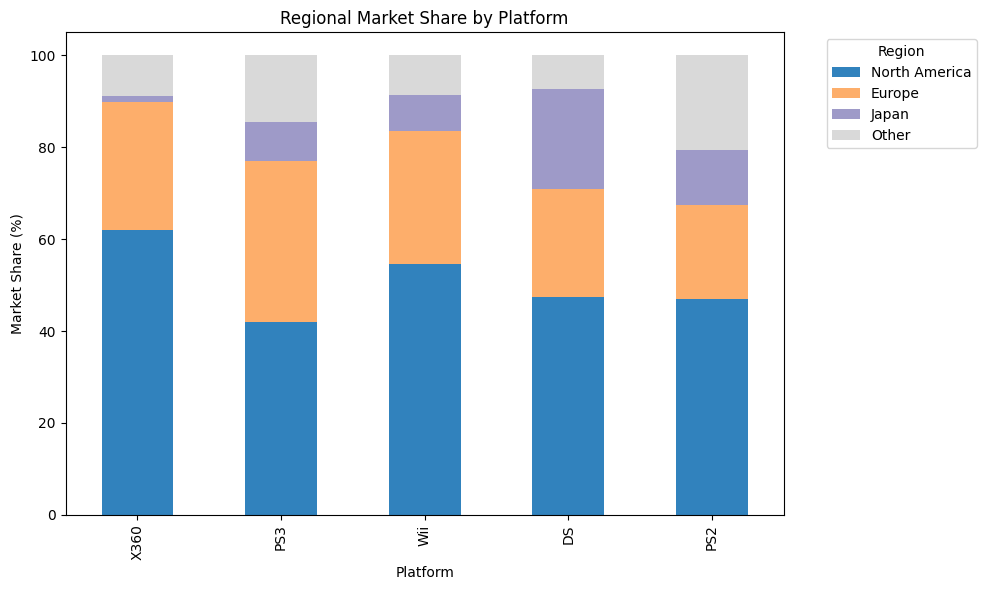

In [53]:
# Analyze each region -top 5 platforms
market_share_plot = top_5_platforms[["platform", "na_share", "eu_share", "jp_share", "other_share"]].copy()

market_share_plot.set_index("platform").plot(
    kind="bar", 
    stacked=True, 
    figsize=(10,6),
    colormap="tab20c"
)

plt.title("Regional Market Share by Platform")
plt.ylabel("Market Share (%)")
plt.xlabel("Platform")
plt.legend(["North America", "Europe", "Japan", "Other"], title="Region",
           bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Observations

The analisis is based on the top 5 best selling platforms from 2005 to 2016. How each platform sold on a specific region, and it's maket share over the platform global sales.

* X360: Leads in North America, with 62% of the sales. But has very weak presence in JP.
* PS3: Is strong in both North America and Europe.
* Wii: Over half of the sales made in North America, but still large European representation.
* DS: Largest representation in North America, followed by similar sales in Japan and Europe
* PS2: Nearly half of the market is in North America, "Other" and Europe

North America holds close to half of all these videogames sales, which means all games also had broad international appeal represented by Japan, Europe and Other sales. 


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [54]:
#Create a comparative platform analysis -on the top 5

region_sales = top_5_platforms.set_index("platform")[["na_sales","eu_sales","jp_sales","other_sales","global_sales"]]

#transpose so regions are rows
region_sales_T = region_sales.T
print(region_sales_T)


platform        X360     PS3     Wii      DS     PS2
na_sales      595.74  390.13  486.87  371.98  200.49
eu_sales      268.32  327.20  258.32  184.48   87.14
jp_sales       12.30   79.41   68.28  171.35   50.98
other_sales    84.88  134.59   77.71   57.68   87.85
global_sales  961.24  931.33  891.18  785.49  426.46


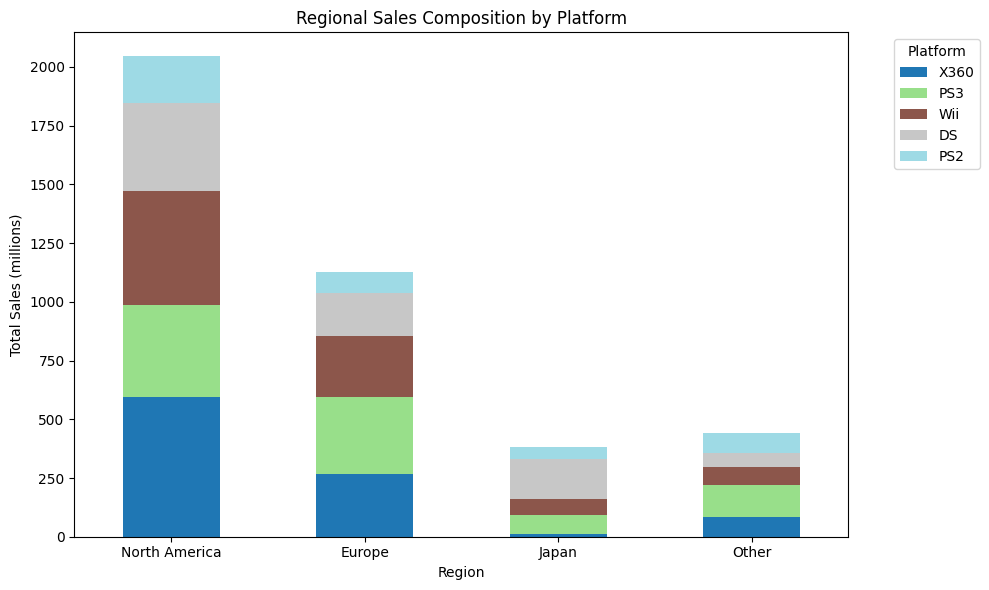

In [55]:
# Visualize cross-regional comparison for top platforms
region_sales_plot= region_sales[["na_sales","eu_sales","jp_sales","other_sales"]]
region_sales_plot_t= region_sales_plot.T

ax = region_sales_plot_t.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)

ax.set_xticklabels(["North America", "Europe", "Japan", "Other"], rotation=0)

plt.title("Regional Sales Composition by Platform")
plt.ylabel("Total Sales (millions)")
plt.xlabel("Region")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

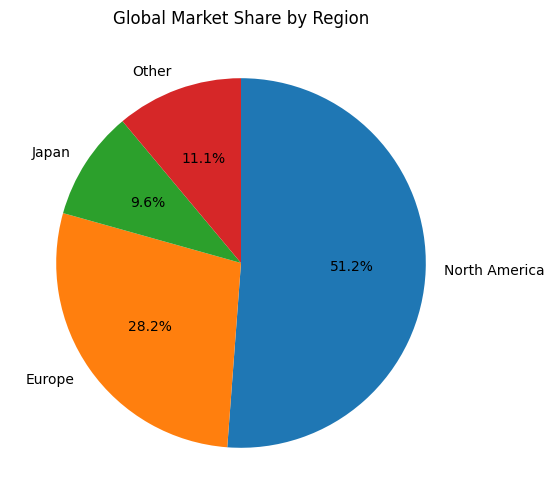

In [56]:
#Pie chart global share by region
region_totals = region_sales_plot.sum()

plt.figure(figsize=(6,6))
plt.pie(
    region_totals, 
    labels=["North America", "Europe", "Japan", "Other"], 
    autopct="%.1f%%",    
    startangle=90,       
    counterclock=False 
)

plt.title("Global Market Share by Region")
plt.show()

### Observations

We analized how each of the top 5 platforms performed inside each region. 

* North America holds just over half of the sales.  When compared with the rest of the world (Japan, Europe and Others) we could say that games have as much appeal in North America as in the rest of the world. With X360 and Wii being the best selling platforms.
* Europe: Over 28% of the global sales. Similarily distributed through all platforms.
* Japan: Smaller market share, over 40% of japan's sales being DS sales.
* Other: Best selling platform PS3

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

           genre  na_sales  eu_sales  jp_sales  other_sales  global_sales
0         Action    580.04    372.58    108.39       141.03       1202.04
10        Sports    432.70    265.60     52.51       102.52        853.33
8        Shooter    400.96    248.07     20.67        88.86        758.56
3           Misc    311.82    167.09     72.49        64.43        615.83
7   Role-Playing    211.85    115.52    179.60        43.81        550.78
6         Racing    163.58    129.05     17.57        44.83        355.03
4       Platform    149.75     86.93     36.32        30.06        303.06
9     Simulation    126.95     86.02     32.33        24.32        269.62
2       Fighting    104.63     47.09     31.68        24.67        208.07
1      Adventure     66.57     39.93     30.27        13.04        149.81
5         Puzzle     49.03     33.81     18.64         8.80        110.28
11      Strategy     30.94     25.41     15.11         6.96         78.42


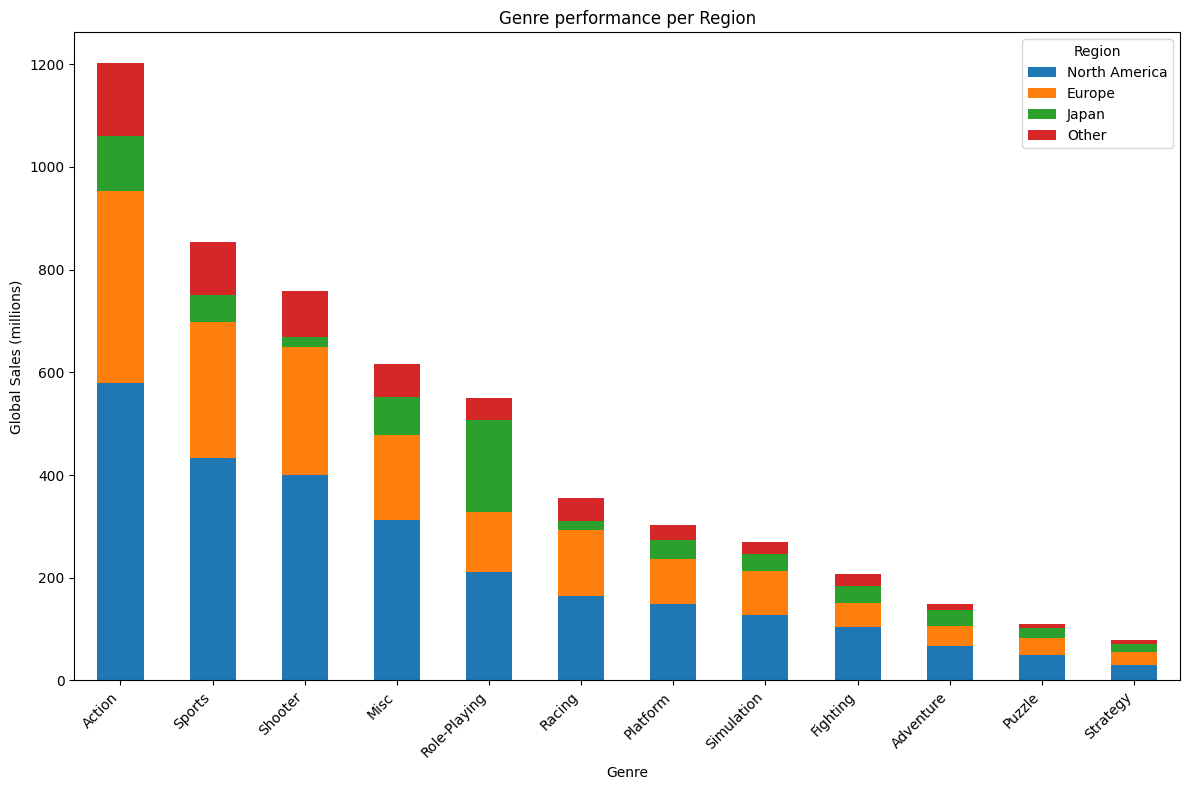

In [57]:
# Function to analyze genre performance by region

genre_region_sales = df_relevant.groupby("genre")[["na_sales","eu_sales","jp_sales","other_sales", "global_sales"]].sum().reset_index().sort_values("global_sales", ascending=False)
print(genre_region_sales)

genre_region_sales_plot=genre_region_sales[["genre","na_sales","eu_sales","jp_sales", "other_sales"]]
    
genre_region_sales_plot.set_index("genre").plot(
    kind="bar", stacked=True, figsize=(12,8)
)
plt.title("Genre performance per Region")
plt.xlabel("Genre")
plt.ylabel("Global Sales (millions)")
plt.xticks(rotation=45, ha="right")
plt.legend(
    ["North America", "Europe", "Japan", "Other"], 
    title="Region"
)
plt.tight_layout()
plt.show()

In [58]:
total_global_sales= genre_region_sales["global_sales"].sum()
print(f'Total global sales:{total_global_sales.round(2)}')

top_5_genre= genre_region_sales.head(5).copy()

top_5_genre_sales=top_5_genre["global_sales"].sum()
print(f'Top 5 genre sales:{top_5_genre_sales.round(2)}')

top5_genre_sales_share=(top_5_genre_sales/total_global_sales)*100
print(f'Percentage of top 5 genre over the total sales:{top5_genre_sales_share.round(2)}%')

Total global sales:5454.83
Top 5 genre sales:3980.54
Percentage of top 5 genre over the total sales:72.97%


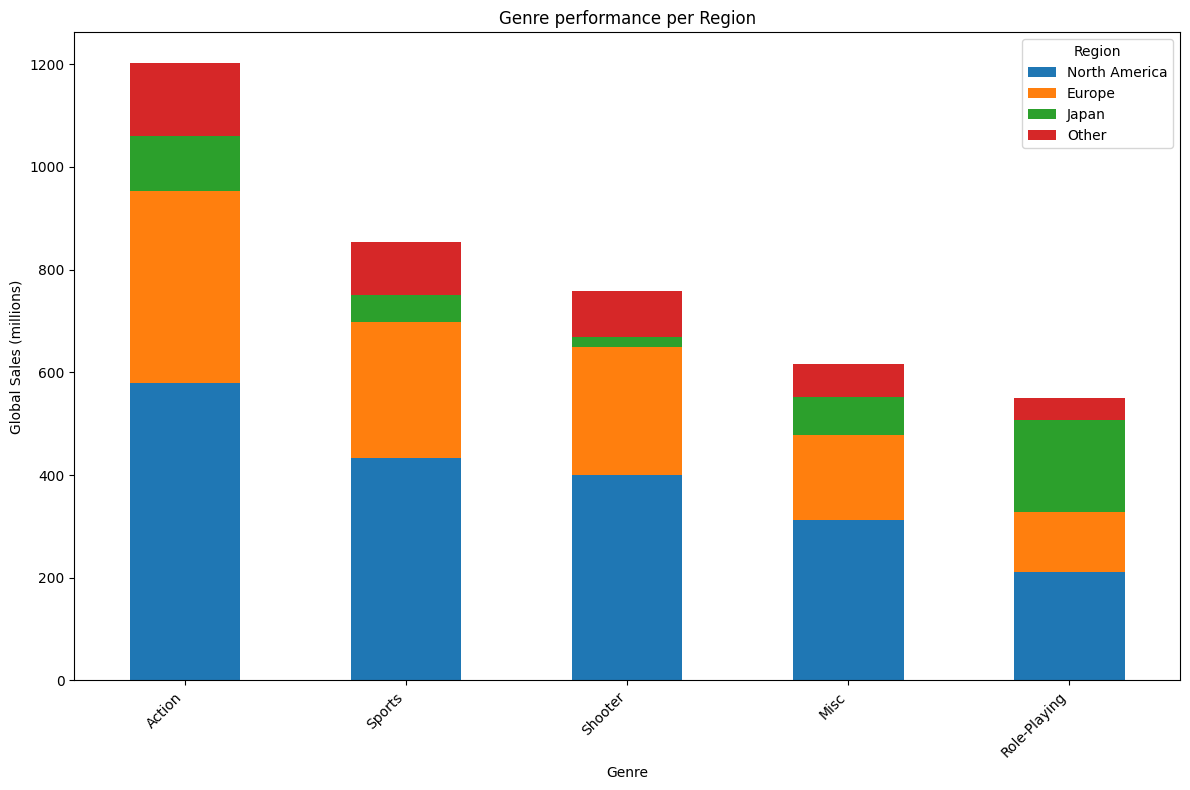

In [59]:
#Close up to the top 5 genres
top_5_genre_plot=top_5_genre[["genre","na_sales","eu_sales","jp_sales", "other_sales"]]

top_5_genre_plot.set_index("genre").plot(
    kind="bar", stacked=True, figsize=(12,8)
)
plt.title("Genre performance per Region")
plt.xlabel("Genre")
plt.ylabel("Global Sales (millions)")
plt.xticks(rotation=45, ha="right")
plt.legend(
    ["North America", "Europe", "Japan", "Other"], 
    title="Region"
)
plt.tight_layout()
plt.show()

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [60]:
# Create a comparative genre analysis
genre_region_sales_plot= top_5_genre[["na_sales","eu_sales","jp_sales","other_sales","genre"]]

genre_region_sales_plot_t = genre_region_sales_plot.T
genre_region_sales_plot_t= genre_region_sales_plot_t.rename_axis("Region").reset_index()
genre_region_sales_plot_t = genre_region_sales_plot_t.set_index("Region").T
genre_region_sales_plot_t = genre_region_sales_plot_t.set_index("genre").T

print(genre_region_sales_plot_t.head())

genre        Action  Sports Shooter    Misc Role-Playing
Region                                                  
na_sales     580.04   432.7  400.96  311.82       211.85
eu_sales     372.58   265.6  248.07  167.09       115.52
jp_sales     108.39   52.51   20.67   72.49        179.6
other_sales  141.03  102.52   88.86   64.43        43.81


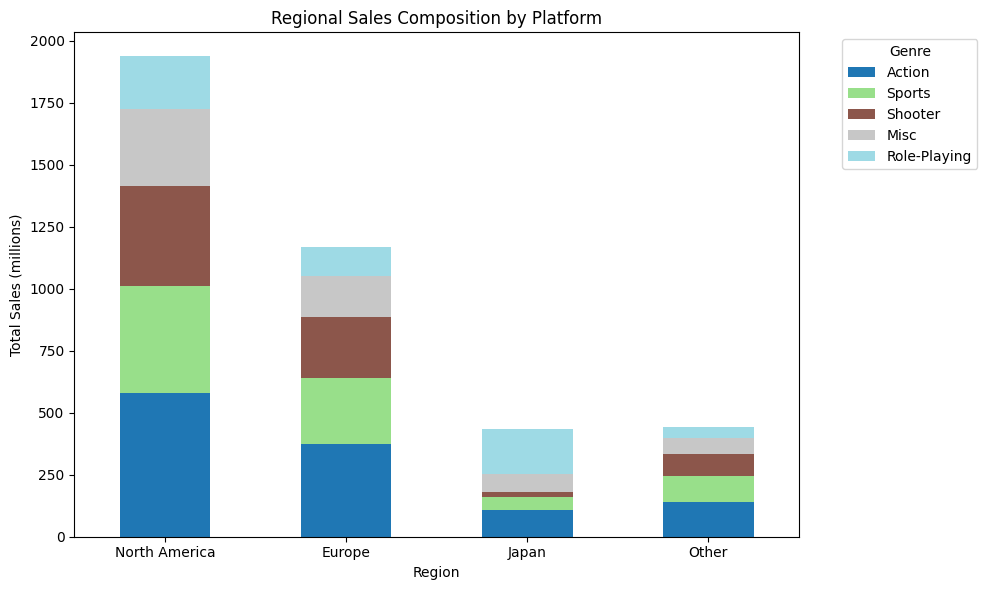

In [61]:
#Plot
ax = genre_region_sales_plot_t.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)

ax.set_xticklabels(["North America", "Europe", "Japan", "Other"], rotation=0)

plt.title("Regional Sales Composition by Platform")
plt.ylabel("Total Sales (millions)")
plt.xlabel("Region")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Observations

*

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

### Observations

* EC (Early Childhood) → Suitable for young children (under 6). Very few games use this today.
* E (Everyone) → Suitable for all ages. May contain minimal cartoon or fantasy violence.
* E10+ (Everyone 10 and older) → Suitable for ages 10+. May have more cartoon/fantasy/mild violence.
* T (Teen) → Suitable for ages 13+. Contains violence, suggestive themes, crude humor, minimal blood, or infrequent strong language.
* M (Mature 17+) → Suitable for ages 17+. Stronger violence, blood, sexual content, strong language.
* AO (Adults Only 18+) → Suitable for adults only. Rare, often banned from major retailers and consoles.
* RP (Rating Pending) → Temporary rating before official review.

  raiting  na_sales  eu_sales  jp_sales  other_sales  global_sales
1       E    873.10    508.70    147.33       176.80       1705.93
5       M    607.34    414.11     46.23       146.16       1213.84
7       T    479.08    258.17     91.32       115.37        943.94
2    E10+    343.02    181.92     39.05        71.37        635.36
0      AO      1.26      0.61      0.00         0.09          1.96
3      EC      1.53      0.11      0.00         0.11          1.75
6      RP      0.00      0.03      0.00         0.01          0.04
4     K-A      0.00      0.00      0.00         0.00          0.00


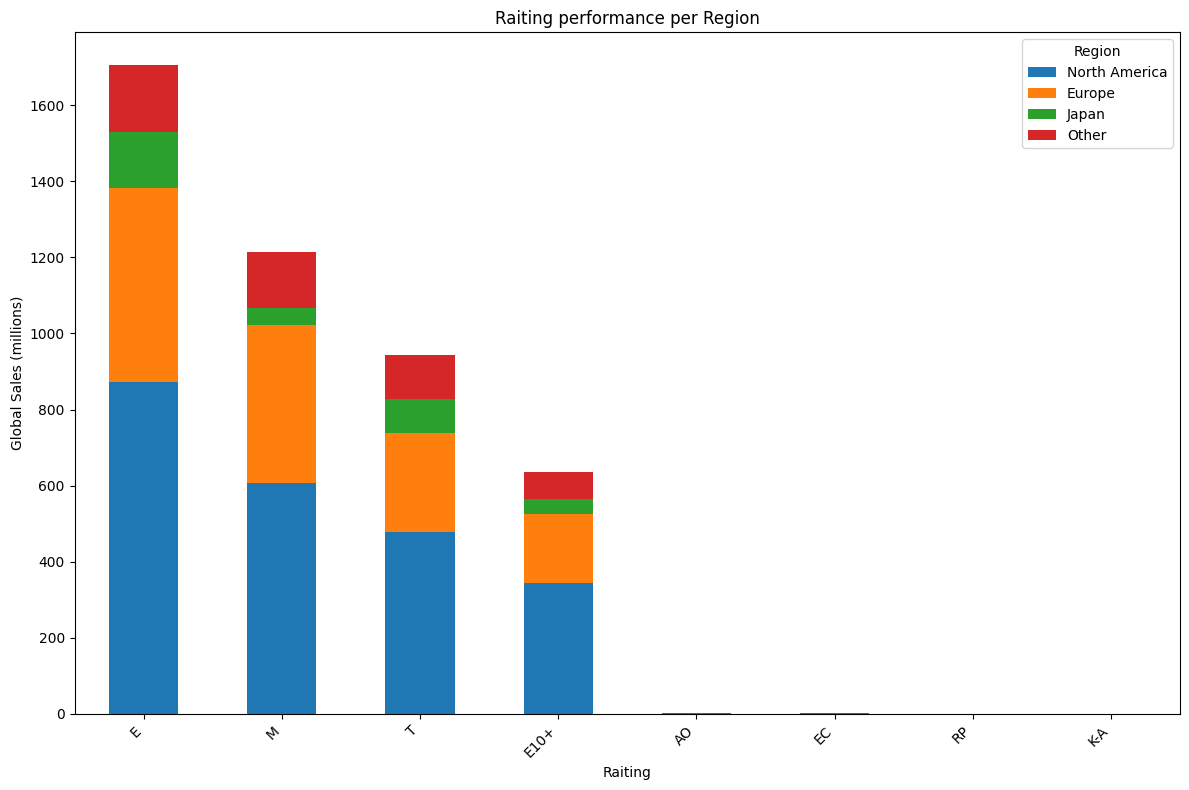

In [62]:
# Function to analyze ESRB rating impact

raiting_region_sales = df_relevant.groupby("raiting")[["na_sales","eu_sales","jp_sales","other_sales", "global_sales"]].sum().reset_index().sort_values("global_sales", ascending=False)
print(raiting_region_sales)

raiting_region_sales_plot=raiting_region_sales[["raiting","na_sales","eu_sales","jp_sales", "other_sales"]]
    
raiting_region_sales_plot.set_index("raiting").plot(
    kind="bar", stacked=True, figsize=(12,8)
)
plt.title("Raiting performance per Region")
plt.xlabel("Raiting")
plt.ylabel("Global Sales (millions)")
plt.xticks(rotation=45, ha="right")
plt.legend(
    ["North America", "Europe", "Japan", "Other"], 
    title="Region"
)
plt.tight_layout()
plt.show()

In [68]:
#Market share 
print(f'Total global sales:{total_global_sales.round(2)}')

top_4_raiting= raiting_region_sales.head(4).copy()

top_4_raiting_sales=top_4_raiting["global_sales"].sum()
print(f'Top 4 raiting sales:{top_4_raiting_sales.round(2)}')

top4_raiting_sales_share=(top_4_raiting_sales/total_global_sales)*100
print(f'Share of top 4 selling raitings over the total sales:{top4_raiting_sales_share.round(2)}%')

Total global sales:5454.83
Top 4 raiting sales:4499.07
Share of top 4 selling raitings over the total sales:82.48%


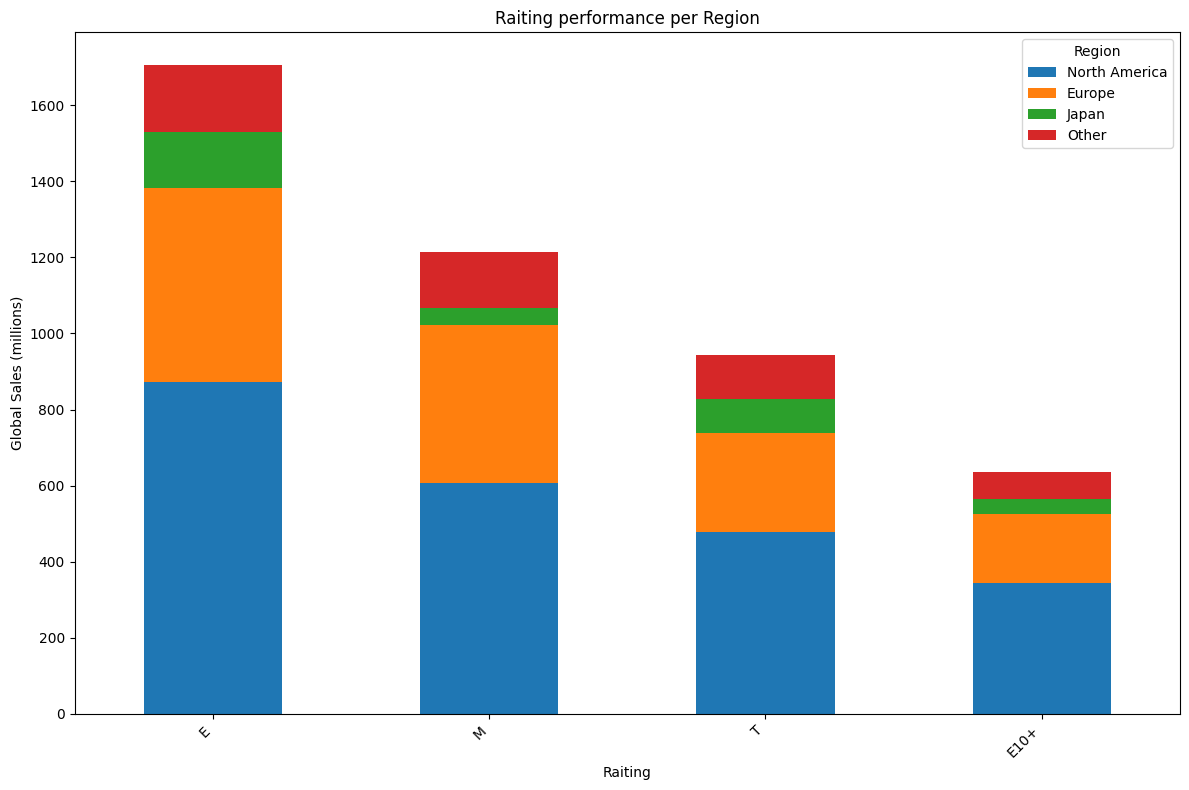

In [64]:
# Top 4 Close-up

top_4_raiting_plot=top_4_raiting[["raiting","na_sales","eu_sales","jp_sales", "other_sales"]]

top_4_raiting_plot.set_index("raiting").plot(
    kind="bar", stacked=True, figsize=(12,8)
)
plt.title("Raiting performance per Region")
plt.xlabel("Raiting")
plt.ylabel("Global Sales (millions)")
plt.xticks(rotation=45, ha="right")
plt.legend(
    ["North America", "Europe", "Japan", "Other"], 
    title="Region"
)
plt.tight_layout()
plt.show()


In [65]:
# Analyze ESRB impact for each region
raiting_region_sales_plot= top_4_raiting[["na_sales","eu_sales","jp_sales","other_sales","raiting"]]

raiting_region_sales_plot_t = raiting_region_sales_plot.T
raiting_region_sales_plot_t= raiting_region_sales_plot_t.rename_axis("Region").reset_index()
raiting_region_sales_plot_t = raiting_region_sales_plot_t.set_index("Region").T
raiting_region_sales_plot_t = raiting_region_sales_plot_t.set_index("raiting").T

print(raiting_region_sales_plot_t.head())

raiting           E       M       T    E10+
Region                                     
na_sales      873.1  607.34  479.08  343.02
eu_sales      508.7  414.11  258.17  181.92
jp_sales     147.33   46.23   91.32   39.05
other_sales   176.8  146.16  115.37   71.37


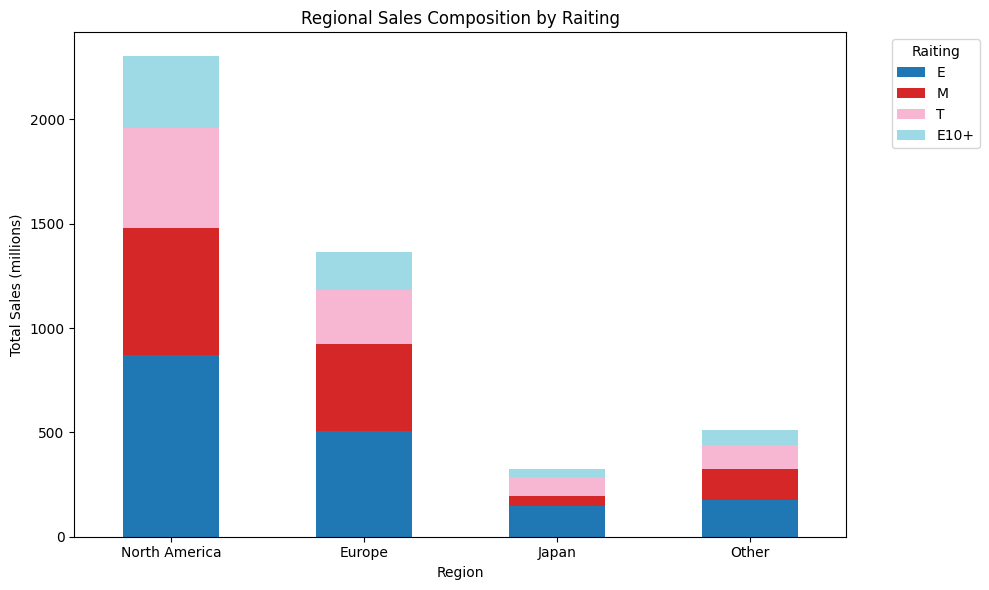

In [66]:
ax = raiting_region_sales_plot_t.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)

ax.set_xticklabels(["North America", "Europe", "Japan", "Other"], rotation=0)

plt.title("Regional Sales Composition by Raiting")
plt.ylabel("Total Sales (millions)")
plt.xlabel("Region")
plt.legend(title="Raiting", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Observations

* E (Everyone) rated games dominate globally. They have the highest total sales, led mainly by North America and Europe, with Japan and Other contributing less.
* M (Mature 17+) games are also strong, particularly in NA and EU, but weaker in Japan.
* T (Teen) rated games sell well but trail behind E and M. Their distribution is more balanced across regions.
* E10+ (Everyone 10+) is the smallest category in terms of total sales on this top 4, but still significant sales against T (Teen), M (Mature 17+), AO (Adults Only 18+), RP (Rating Pending).
-----
* North America, Largest market overall, with a mix of E and M games. NA clearly drives the success of M-rated blockbusters.
* Europe, Similar to NA but with slightly less emphasis on M-rated games and relatively strong E-rated sales.
* Japan, A much smaller market in total size. The sales that do exist lean toward E-rated and T-rated games, showing less appetite for M-rated content.
* Other regions, Smaller market overall, but follows the NA/EU pattern (E and M leading).

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


### Observations
Null hypothesis (H₀): The mean user ratings for Xbox One and PC games are equal.
Alternative hypothesis (H₁): The mean user ratings for Xbox One and PC games are different.

In [67]:
# Xbox One vs PC
xone_scores = df_relevant.loc[df_relevant['platform'] == 'XOne', 'user_score']
pc_scores = df_relevant.loc[df_relevant['platform'] == 'PC', 'user_score']

# Action vs Sports
action_scores = df_relevant.loc[df_relevant['genre'] == 'Action', 'user_score']
sports_scores = df_relevant.loc[df_relevant['genre'] == 'Sports', 'user_score']

from scipy import stats

alpha = 0.05  # significance level

# Xbox One vs PC
t_stat1, p_val1 = stats.ttest_ind(xone_scores, pc_scores, equal_var=False, nan_policy='omit')

# Action vs Sports
t_stat2, p_val2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False, nan_policy='omit')

print("Xbox One vs PC: t = {:.3f}, p = {:.3f}".format(t_stat1, p_val1))
print("Action vs Sports: t = {:.3f}, p = {:.3f}".format(t_stat2, p_val2))

# Interpret results
if p_val1 < alpha:
    print("Reject H0: Xbox One and PC have different average user ratings")
else:
    print("Fail to reject H0: No evidence of difference between Xbox One and PC")

if p_val2 < alpha:
    print("Reject H0: Action and Sports have different average user ratings")
else:
    print("Fail to reject H0: No evidence of difference between Action and Sports")

Xbox One vs PC: t = -3.067, p = 0.002
Action vs Sports: t = 5.840, p = 0.000
Reject H0: Xbox One and PC have different average user ratings
Reject H0: Action and Sports have different average user ratings


### Observations
Null hypotheses:
H0: Xbox One and PC have the same average user rating.
H0: Action and Sports games have the same average user rating.

Alternative hypotheses:
H1: Xbox One and PC have different average user ratings.
H1: Action and Sports games have different average user ratings.

Test chosen: Welch’s two-sample t-test (independent samples).Appropriate because we are comparing means between two independent groups. Welch’s version is robust when group variances may be unequal.

Significance level: α = 0.05.

Decision rule: Reject H₀ if p < α.



# Step 6. Write a general conclusion


The data shows that the video game industry follows clear cycles of growth, peak, and decline, strongly influenced by platform lifecycles and blockbuster titles. From the rapid acceleration of the 2000s to the structural decline after 2009, the industry’s momentum has always been tied to hardware generations and market saturation.

Key conclusions include:

* Platforms rise and fall — no console sustains growth forever, but each generation leaves a unique mark on the market. North America dominates global sales, though Europe and Japan shape regional trends.
* Genres show distinct patterns — Action leads in volume and total sales, but its success is quantity-driven. Shooter excels in per-game averages, while Sports maintains balanced strength across all measures.
* Ratings influence outcomes — E-rated and M-rated titles dominate globally, while regional preferences shape demand (e.g., Japan leaning more toward E/T-rated games).
* Sales are highly uneven — most games sell under 2 million copies, while a small group of blockbusters (like Wii Sports or DS hits) drive huge spikes, skewing averages.
* Scores and sales correlate only moderately — critic reviews align better with commercial performance than user scores, but neither guarantees success.
* Hypothesis testing confirms differences — platforms and genres vary significantly in user ratings, reinforcing the idea that not all markets or categories perform equally.
* Overall, the project demonstrates that the video game market is defined by cycles, competition, and standout successes. While reviews and ratings matter, long-term industry performance has been driven most by platform transitions, blockbuster releases, and regional market dynamics.